<a href="https://colab.research.google.com/github/abrahamcab555/Tec/blob/main/Proyecto_20250216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
DIR = "/content/drive/MyDrive/"
os.chdir(DIR)

In [5]:
d_2023 = pd.read_csv('datos_2023.csv', delimiter = ",")
d_2024 = pd.read_csv('datos_2024.csv', delimiter = ",")
d_2022 = pd.read_csv('datos_2022.csv', delimiter = ",")

In [6]:
d_2024 = pd.read_csv('datos_2024.csv', delimiter = ",")

In [7]:
d_2023["target"].value_counts()

target
0    2642053
1     119993
Name: count, dtype: int64

In [8]:
d_2023=d_2023[d_2023["target"]==1]
d_2023["target"].value_counts()
d_2022=d_2022[d_2022["target"]==1]


In [9]:
d_2024["target"].value_counts(normalize=1)

target
0    0.957927
1    0.042073
Name: proportion, dtype: float64

In [10]:
# Eliminar el % de valores de la clase mayoritaria del 2024

# Fijar semilla para reproducibilidad
np.random.seed(42)

# Filtrar registros donde target == 0
subset_target_0 = d_2024[d_2024["target"] == 0]

# Obtener las combinaciones únicas de uuid_rec y mes en target == 0
uuid_mes_unicos = subset_target_0[["uuid_rec", "mes"]].drop_duplicates()

# Seleccionar aleatoriamente el 20% de estas combinaciones
uuid_mes_a_eliminar = uuid_mes_unicos.sample(frac=0.6, random_state=42)

# Fusionar con el DataFrame original para identificar los registros a eliminar
d_2024_filtrado = d_2024.merge(uuid_mes_a_eliminar, on=["uuid_rec", "mes"], how="left", indicator=True)

# Conservar solo los registros que NO fueron marcados para eliminación
d_2024_filtrado = d_2024_filtrado[d_2024_filtrado["_merge"] == "left_only"].drop(columns=["_merge"])

# Mostrar resultados
print(f"Registros originales: {len(d_2024)}")
print(f"Registros después de eliminación: {len(d_2024_filtrado)}")

# Si deseas sobrescribir el dataframe original
d_2024 = d_2024_filtrado

Registros originales: 1855221
Registros después de eliminación: 788921


In [11]:
d_2024["target"].value_counts(normalize=1)

target
0    0.901062
1    0.098938
Name: proportion, dtype: float64

In [12]:
print("Tamaño base 2022 : " + str(len(d_2022)))
print("Tamaño base 2023 : " + str(len(d_2023)))
print("Tamaño base 2024 : " + str(len(d_2024)))

Tamaño base 2022 : 115267
Tamaño base 2023 : 119993
Tamaño base 2024 : 788921


In [13]:
datos_df = pd.concat([d_2022,d_2023, d_2024], ignore_index=True)

print("Tamaño base 2024 : " + str(len(datos_df)))

Tamaño base 2024 : 1024181


In [14]:

datos_df["target"].value_counts(normalize=1)

target
0    0.694083
1    0.305917
Name: proportion, dtype: float64

In [15]:
 datos_df.head()

em_segmento em_tipo_gob genero      uuid_rec  target mes_informacion  \
0         PYME         NaN      M  fee79fef-9a2       1      2022-01-01   
1  CORPORATIVA         NaN      M  fe394057-645       1      2022-01-01   
2         PYME         NaN      M  fbcdd913-ec8       1      2022-01-01   
3         PYME         NaN      M  f9e9ca3b-643       1      2022-01-01   
4         PYME         NaN      M  fad4cfb2-037       1      2022-01-01   

   f_con_credito  mes  creditos  cte_creds_prom_3ant  ...  \
0              0    1         0                  0.0  ...   
1              1    1         1                  1.0  ...   
2              1    1         1                  1.0  ...   
3              0    1         0                  0.0  ...   
4              0    1         0                  0.0  ...   

   em_empl_cred_prom_6m  em_sdo_creds_emp  em_empl_saldcredt_prom_3m  \
0                 6.333          72203.56                  74036.383   
1               244.500        2496874.94                2894989.183   
2                 7.167          36449.71                  33464.413   
3                 7.000          60283.53                  60445.157   
4                29.667         137568.42                 129316.500   

   em_empl_saldcredt_prom_6m  em_vencido_emp  em_empl_ven_prom_3m  \
0                  74066.122             0.0                  0.0   
1                2997640.285             0.0                  0.0   
2                  34390.750             0.0                  0.0   
3                  80258.880             0.0                  0.0   
4                 119520.798             0.0                  0.0   

   em_empl_ven_prom_6m  em_castigos_emp  em_empl_cast_3m  em_empl_cast_6m  
0                  0.0              0.0              0.0             0.00  
1                  0.0              0.0              0.0             0.00  
2                  0.0              0.0              0.0             0.00  
3                  0.0              0.0              0.0             0.00  
4                  0.0              0.0              0.0           363.96  

[5 rows x 50 columns]

In [16]:
# Se crean nuevas variables para medir cambios de los datos observados vs los promedios de los últimos 3 o 6 meses
# Diccionario con la estructura variable_resultado: (numerador, denominador)
variables = {
    "tasa_creds_3m": ("creditos", "cte_creds_prom_3ant"),
    "tasa_disp_3m": ("dispersion", "cte_dip_prom_3m"),
    "tasa_cap_3m": ("sdo_prom_capt", "sdo_cap_prom_3ant"),
    "tasa_rot_3m": ("em_rotacion_6m", "em_r6m_prom_3m"),
    "tasa_em_empl_3m": ("em_empleados", "em_empl_prom_3m"),
    "tasa_em_disp_3m": ("em_dispersion_empleados", "em_disp_prom_3m"),
    "tasa_penetracion_3m": ("em_porc_pen", "em_porc_pen_prom_3m"),
    "tasa_em_disp_prom_3m": ("em_disp_emp_prom", "em_disp_empl_prom_3m"),
    "tasa_em_creds_3m": ("em_num_creds_emp", "em_empl_cred_prom_3m"),
    "tasa_em_sdo_creds_3m": ("em_sdo_creds_emp", "em_empl_saldcredt_prom_3m"),
    "tasa_vencido_em_3m": ("em_vencido_emp", "em_empl_ven_prom_3m"),
    "tasa_cast_em_3m": ("em_castigos_emp", "em_empl_cast_3m"),
    "tasa_disper_vs_inicial": ("dispersion", "dispersion_inicial"),
    "cap3m_disp3m": ("sdo_cap_prom_3ant", "cte_dip_prom_3m"),
    "cap6m_disp6m": ("sdo_cap_prom_6ant", "cte_dip_prom_6m"),
    "catp_disper": ("sdo_prom_capt", "dispersion"),
    "disp6m_dispinicial": ("cte_dip_prom_6m", "dispersion_inicial"),
    "disp3m_dispinicial": ("cte_dip_prom_3m", "dispersion_inicial"),
    "tasa_creds_6m": ("creditos", "cte_creds_prom_6ant"),
    "tasa_disp_6m": ("dispersion", "cte_dip_prom_6m"),
    "tasa_cap_6m": ("sdo_prom_capt", "sdo_cap_prom_6ant"),
    "tasa_rot_6m": ("em_rotacion_6m", "em_r6m_prom_6m"),
    "tasa_em_empl_6m": ("em_empleados", "em_empl_prom_6m"),
    "tasa_em_disp_6m": ("em_dispersion_empleados", "em_disp_prom_6m"),
    "tasa_penetracion_6m": ("em_porc_pen", "em_porc_pen_prom_6m"),
    "tasa_em_disp_prom_6m": ("em_disp_emp_prom", "em_disp_empl_prom_6m"),
    "tasa_em_creds_6m": ("em_num_creds_emp", "em_empl_cred_prom_6m"),
    "tasa_em_sdo_creds_6m": ("em_sdo_creds_emp", "em_empl_saldcredt_prom_6m"),
    "tasa_vencido_em_6m": ("em_vencido_emp", "em_empl_ven_prom_6m"),
    "tasa_cast_em_6m": ("em_castigos_emp", "em_empl_cast_6m"),

     "disper_edad_ingreso": ("dispersion", "edad_ingreso"),
    "disper_edad_mes": ("dispersion", "edad_perdida_emp")

}

# Crear las nuevas variables con tratamiento de división por cero
for nueva_var, (num, denom) in variables.items():
    datos_df[nueva_var] = datos_df[num] / datos_df[denom]
    datos_df[nueva_var] = datos_df[nueva_var].where(datos_df[denom] != 0, 0)  # Si el denominador es 0, asigna 0

# Mostrar el DataFrame con las nuevas variables
print(datos_df.head())

   em_segmento em_tipo_gob genero      uuid_rec  target mes_informacion  \
0         PYME         NaN      M  fee79fef-9a2       1      2022-01-01   
1  CORPORATIVA         NaN      M  fe394057-645       1      2022-01-01   
2         PYME         NaN      M  fbcdd913-ec8       1      2022-01-01   
3         PYME         NaN      M  f9e9ca3b-643       1      2022-01-01   
4         PYME         NaN      M  fad4cfb2-037       1      2022-01-01   

   f_con_credito  mes  creditos  cte_creds_prom_3ant  ...  tasa_em_empl_6m  \
0              0    1         0                  0.0  ...         1.000000   
1              1    1         1                  1.0  ...         0.968707   
2              1    1         1                  1.0  ...         0.970617   
3              0    1         0                  0.0  ...         0.895522   
4              0    1         0                  0.0  ...         0.982180   

   tasa_em_disp_6m  tasa_penetracion_6m  tasa_em_disp_prom_6m  \
0         0.850

## **EDA**

**El Análisis Exploratorio de Datos** (EDA, por sus siglas en inglés) es el proceso inicial en la ciencia de datos que permite comprender la estructura, la calidad y las relaciones dentro del conjunto de datos antes de aplicar modelos de machine learning o técnicas avanzadas.

In [15]:
# Dimensiones del dataset
print(f"Filas: {datos_df.shape[0]}, Columnas: {datos_df.shape[1]}")


Filas: 1024181, Columnas: 82


In [16]:
# Tipos de datos y valores nulos
print(datos_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024181 entries, 0 to 1024180
Data columns (total 82 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   em_segmento                1023330 non-null  object 
 1   em_tipo_gob                317052 non-null   object 
 2   genero                     1024181 non-null  object 
 3   uuid_rec                   1024181 non-null  object 
 4   target                     1024181 non-null  int64  
 5   mes_informacion            1024181 non-null  object 
 6   f_con_credito              1024181 non-null  int64  
 7   mes                        1024181 non-null  int64  
 8   creditos                   1024181 non-null  int64  
 9   cte_creds_prom_3ant        1024181 non-null  float64
 10  cte_creds_prom_6ant        1024181 non-null  float64
 11  dispersion_inicial         1024181 non-null  float64
 12  dispersion                 1024181 non-null  float64
 13  cte_dip_prom

In [17]:
# Renombrar variable de edad
datos_df.rename(columns={'edad_perdida_emp': 'edad_observacion'}, inplace=True)

In [18]:
#Estadística descriptiva
df_describe = datos_df.describe().T
pd.options.display.float_format = '{:.2f}'.format
df_describe

count   mean    std   min    25%    50%    75%  \
target               1024181.00   0.31   0.46  0.00   0.00   0.00   1.00   
f_con_credito        1024181.00   0.15   0.36  0.00   0.00   0.00   0.00   
mes                  1024181.00   4.93   2.70  1.00   3.00   5.00   7.00   
creditos             1024181.00   0.18   0.47  0.00   0.00   0.00   0.00   
cte_creds_prom_3ant  1024181.00   0.18   0.46  0.00   0.00   0.00   0.00   
...                         ...    ...    ...   ...    ...    ...    ...   
tasa_em_sdo_creds_6m 1024181.00   0.94   0.46  0.00   0.93   1.01   1.07   
tasa_vencido_em_6m   1024181.00   0.18   0.45  0.00   0.00   0.00   0.00   
tasa_cast_em_6m      1024181.00   0.04   0.25 -0.13   0.00   0.00   0.00   
disper_edad_ingreso  1024181.00 370.38 657.23  0.00 174.94 283.63 447.60   
disper_edad_mes      1024181.00 342.40 608.15  0.00 165.02 265.63 414.81   

                           max  
target                    1.00  
f_con_credito             1.00  
mes                      12.00  
creditos                 11.00  
cte_creds_prom_3ant      11.67  
...                        ...  
tasa_em_sdo_creds_6m      5.73  
tasa_vencido_em_6m        3.66  
tasa_cast_em_6m           4.69  
disper_edad_ingreso  235946.55  
disper_edad_mes      220474.64  

[77 rows x 8 columns]

In [18]:
datos_df.describe(include="object")

em_segmento em_tipo_gob   genero      uuid_rec mes_informacion
count      1023330      317052  1024181       1024181         1024181
unique           9           4        4        515552              32
top           PYME   MUNICIPAL        M  ff58b961-195      2024-03-01
freq        431793      180735   598556             9          100374

In [19]:
datos_df['mes'] =datos_df['mes'].astype(str)

In [20]:
 categoricas = [ 'em_segmento',  'em_tipo_gob' , 'genero' , 'mes']

In [21]:
# Conteo de categorías
print(datos_df[categoricas].nunique())

em_segmento     9
em_tipo_gob     4
genero          4
mes            12
dtype: int64


In [22]:
# Porcentaje de valores nulos por columna
porcentaje_nulos = datos_df.isnull().mean() * 100
porcentaje_nulos


em_segmento              0.083091
em_tipo_gob             69.043362
genero                   0.000000
uuid_rec                 0.000000
target                   0.000000
                          ...    
tasa_em_sdo_creds_6m     0.000000
tasa_vencido_em_6m       0.000000
tasa_cast_em_6m          0.000000
disper_edad_ingreso      0.000000
disper_edad_mes          0.000000
Length: 82, dtype: float64

In [23]:
datos_df.loc[datos_df['em_segmento'] == 'GOBIERNO', 'em_segmento'] = datos_df['em_tipo_gob']

In [24]:
# Para visualizar la distribución del cambpo em_segmento
conteo = datos_df["em_segmento"].value_counts()
porcentaje = datos_df["em_segmento"].value_counts(normalize=True) * 100
resultado = pd.DataFrame({"Conteo": conteo, "Porcentaje": porcentaje})
print(resultado)

                  Conteo  Porcentaje
em_segmento                         
PYME              431793   42.234225
MUNICIPAL         180471   17.652099
EMPRESAS          162631   15.907146
ESTATAL           124075   12.135934
CORPORATIVA        78294    7.658036
PRIVADA            19515    1.908787
RELACIONADA        13003    1.271840
FEDERAL            12046    1.178235
INCLUSION SOCIAL     331    0.032376
AFIRME               172    0.016824
ALIANZAS              34    0.003326
FIDEICOMISO           12    0.001174


In [25]:
# Hacemos un reagrupado para reducir las categorías
mapeo_segmento = {
    "FEDERAL": "ESTATAL",  # Agrupar FEDERAL con ESTATAL
    "PRIVADA": "CORPORATIVO",
    "RELACIONADA": "CORPORATIVO",
    "INCLUSION SOCIAL": "CORPORATIVO",
    "AFIRME": "CORPORATIVO",
    "ALIANZAS": "CORPORATIVO",
    "FIDEICOMISO": "CORPORATIVO",

    "CORPORATIVA": "CORPORATIVO"
    }

# Aplicar el mapeo a la columna
datos_df["em_segmento"] = datos_df["em_segmento"].replace(mapeo_segmento)



In [26]:
# Para visualizar la distribución del cambpo em_segmento
conteo = datos_df["em_segmento"].value_counts()
porcentaje = datos_df["em_segmento"].value_counts(normalize=True) * 100
resultado = pd.DataFrame({"Conteo": conteo, "Porcentaje": porcentaje})
print(resultado)

             Conteo  Porcentaje
em_segmento                    
PYME         431793   42.234225
MUNICIPAL    180471   17.652099
EMPRESAS     162631   15.907146
ESTATAL      136121   13.314169
CORPORATIVO  111361   10.892362


In [27]:
#Imputación de "segmento" con la moda
datos_df["em_segmento"].fillna(datos_df["em_segmento"].mode()[0], inplace=True)
# Verificar que no haya valores faltantes en la columna
print(datos_df["em_segmento"].isnull().sum())
# Mostrar las frecuencias de la variable categórica
print(datos_df["em_segmento"].value_counts())

0
em_segmento
PYME           433597
MUNICIPAL      180471
EMPRESAS       162631
ESTATAL        136121
CORPORATIVO    111361
Name: count, dtype: int64


<ipython-input-27-ef21206b2883>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_df["em_segmento"].fillna(datos_df["em_segmento"].mode()[0], inplace=True)


In [28]:
datos_df['genero'].value_counts()

genero
M       598556
F       425575
Otro        48
R            2
Name: count, dtype: int64

In [29]:
#Imputación de "genero" con la moda para los datos que no sean "M" o "F"

# Calcular la moda de la variable "genero"
moda_genero = datos_df['genero'].mode()[0]  # La moda es el valor más frecuente

# Reemplazar valores que no sean "F" o "M" con la moda
datos_df.loc[~datos_df['genero'].isin(['F', 'M']), 'genero'] = moda_genero

In [30]:
datos_df['genero'].value_counts()

genero
M    598606
F    425575
Name: count, dtype: int64

In [31]:
# Se elimina por tener 63% de nulos
datos_df = datos_df.drop(columns=['em_tipo_gob'])

In [32]:
#Tamaño del df antes de eliminar duplicados
print(len(datos_df))

1024181


In [33]:
# Eliminar duplicados si existen
datos_df = datos_df.drop_duplicates()
print(len(datos_df))

1024181


In [34]:
# Se crea lista para agrupar las variables numéricas y puedan manipularse fácilmente
numericas = datos_df.select_dtypes(include=['number']).columns.tolist()
numericas = [col for col in numericas if col != 'target']
numericas

['f_con_credito',
 'creditos',
 'cte_creds_prom_3ant',
 'cte_creds_prom_6ant',
 'dispersion_inicial',
 'dispersion',
 'cte_dip_prom_3m',
 'cte_dip_prom_6m',
 'sdo_prom_capt',
 'sdo_cap_prom_3ant',
 'sdo_cap_prom_6ant',
 'edad_ingreso',
 'edad_observacion',
 'meses_antig_en_bco',
 'meses_antig_en_emp',
 'em_antig_dispersando',
 'em_rotacion_6m',
 'em_r6m_prom_3m',
 'em_r6m_prom_6m',
 'em_empleados',
 'em_empl_prom_3m',
 'em_empl_prom_6m',
 'em_dispersion_empleados',
 'em_disp_prom_3m',
 'em_disp_prom_6m',
 'em_porc_pen',
 'em_porc_pen_prom_3m',
 'em_porc_pen_prom_6m',
 'em_disp_emp_prom',
 'em_disp_empl_prom_3m',
 'em_disp_empl_prom_6m',
 'em_num_creds_emp',
 'em_empl_cred_prom_3m',
 'em_empl_cred_prom_6m',
 'em_sdo_creds_emp',
 'em_empl_saldcredt_prom_3m',
 'em_empl_saldcredt_prom_6m',
 'em_vencido_emp',
 'em_empl_ven_prom_3m',
 'em_empl_ven_prom_6m',
 'em_castigos_emp',
 'em_empl_cast_3m',
 'em_empl_cast_6m',
 'tasa_creds_3m',
 'tasa_disp_3m',
 'tasa_cap_3m',
 'tasa_rot_3m',
 'tasa_em

In [32]:

#Calculando los datos
#for col_num in numericas:
#  print(f"\n Análisis de la columna: {col_num}")
#  Q1p = datos_df[col_num].quantile(0.25)
#  print("Cuartil 1= ", Q1p)
#  Q3p = datos_df[col_num].quantile(0.75)
#  print("Cuartil 3= ", Q3p)
#  IQp = Q3p-Q1p
#  print("Rango intercuartilico= ", IQp)
#  Medianap = datos_df[col_num].median()
#  print("Mediana = ", Medianap)
#  Minp = datos_df[col_num].min()
#  print("Valor minimo = ", Minp)
#  Maxp = datos_df[col_num].max()
#  print("Valor maximo = ", Maxp)

  #Calculando bigote superior e ingerior
#  lsp = (Q3p + 1.5*IQp)
#  print("El bigote superior de la gráfica de cajas es ", lsp)
#  lip = (Q1p - 1.5*IQp)
#  print("El bigote inferior de la gráfica de cajas es ", lip)

  #Ubicando los outliers en cada columna numérica
#  ubicacionp = (datos_df[col_num] <lip) | (datos_df[col_num]>lsp)

  #Obteniendo los outliers (datos atípicos) de price
#  outliersp = datos_df[col_num][ubicacionp]

  #Contando los outliers
#  print("los datos atípicos en esta columna son:", outliersp.count())

#  plt.figure(figsize=(5, 3))
#  datos_df[col_num].plot(kind="box", vert=False)
#  plt.title(f"Boxplot de {col_num}")
#  plt.show()

  #Calculando % de valores atípicos
#  num_registrosa = datos_df[col_num].count().sum()
#  num_registrosa
#  porc_outl_a= outliersp.count()/num_registrosa
#  print("El porcentaje total de outliers (valores atípicos) en la columna {col_num} es:",(porc_outl_a)*100,"%")

  #SE PUEDEN RELLENAR O ELIMINAR ESTOS VALORES ATÍPICOS, SERÁ DECISIÓN DE VER QUÉ PODEMOS HACER CON ESTOS DATOS


In [24]:

# Outliers

# Usando el método IQR (Interquartile Range)
Q1 = datos_df[numericas].quantile(0.25)

Q3 = datos_df[numericas].quantile(0.75)
IQR = Q3 - Q1

# Filtrar posibles outliers
outliers = ((datos_df[numericas] < (Q1 - 1.5 * IQR)) | (datos_df[numericas] > (Q3 + 1.5 * IQR))).sum()

# Calcular el porcentaje de outliers por variable
total_filas = datos_df.shape[0]
porcentaje_outliers = (outliers / total_filas) * 100


# Ordenar los porcentajes de mayor a menor
porcentaje_outliers_ordenado = porcentaje_outliers.sort_values(ascending=False)

# Configurar Pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)  # Muestra todas las filas

# Mostrar resultados ordenados
print("\nPorcentaje de posibles outliers por variable (ordenado de mayor a menor):")
print(porcentaje_outliers_ordenado)



Porcentaje de posibles outliers por variable (ordenado de mayor a menor):
tasa_em_sdo_creds_3m         24.935648
tasa_em_sdo_creds_6m         24.228138
em_empl_ven_prom_3m          23.691344
em_vencido_emp               19.166816
tasa_vencido_em_6m           19.166816
tasa_vencido_em_3m           19.166816
tasa_em_creds_6m             18.742707
tasa_em_empl_3m              18.362407
cte_creds_prom_6ant          18.311113
cte_creds_prom_3ant          17.887590
creditos                     17.777272
tasa_creds_6m                17.777272
f_con_credito                17.777272
tasa_em_creds_3m             17.761064
tasa_creds_3m                17.681109
em_empl_cast_6m              17.336452
tasa_em_empl_6m              16.748459
tasa_penetracion_6m          15.445335
em_empl_ven_prom_6m          14.860799
sdo_prom_capt                14.443945
sdo_cap_prom_3ant            13.933798
tasa_penetracion_3m          13.876298
tasa_rot_3m                  13.821316
catp_disper                 

<ipython-input-25-0178a1959e1c>:24: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta el rectángulo para dar espacio al suptítulo


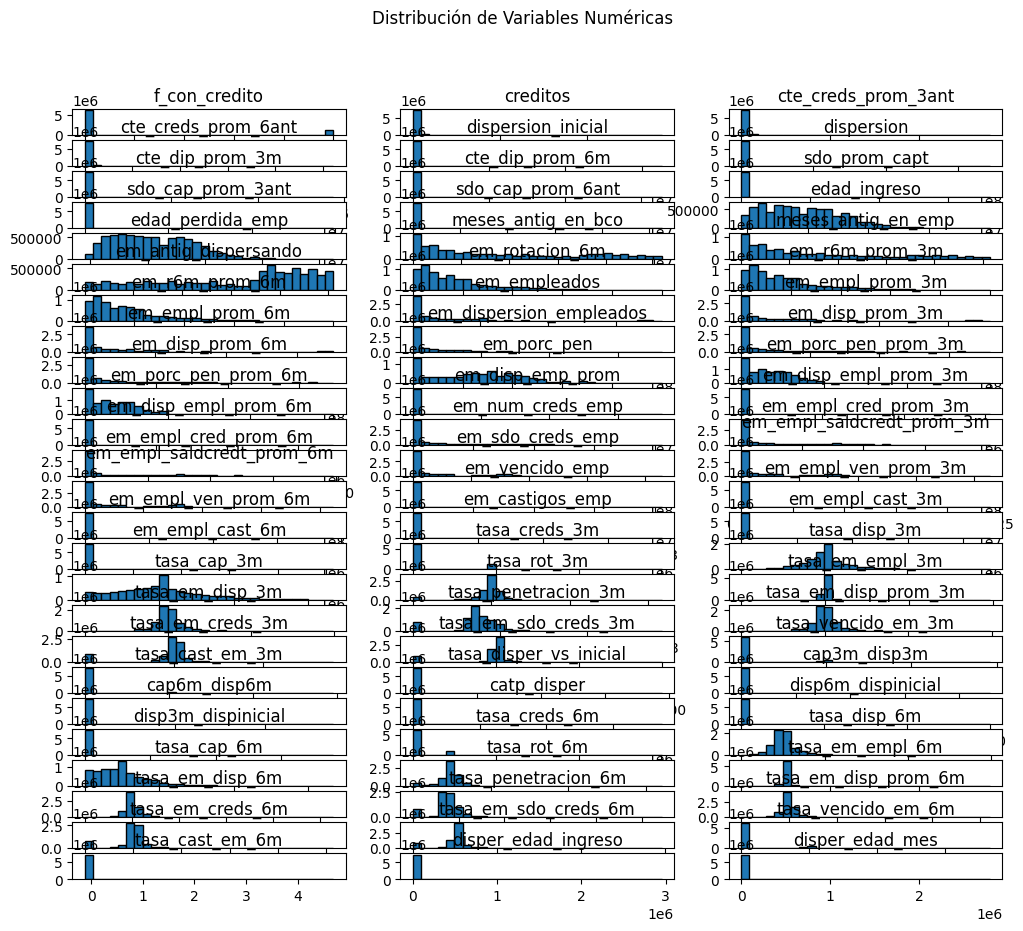

In [25]:

# Suponiendo que 'numericas' es una lista con los nombres de las variables numéricas
# Crear un número de filas y columnas dinámicas para acomodar los histogramas
n = len(numericas)
ncols = 3  # Número de columnas en la gráfica
nrows = (n // ncols) + (n % ncols > 0)  # Número de filas, asegurando que todos los gráficos caben

# Crear una figura con subgráficas ajustadas
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))
axes = axes.flatten()  # Aplanar para facilitar el acceso a cada subgráfico

# Crear histogramas solo para las variables numéricas
for i, var in enumerate(numericas):
    axes[i].hist(datos_df[var], bins=30, edgecolor='black')
    axes[i].set_title(var)  # Título para cada gráfico individual

# Eliminar los ejes de las subgráficas que no tengan datos
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

# Título general para el gráfico
plt.suptitle("Distribución de Variables Numéricas")

# Ajustar espacio entre las subgráficas para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta el rectángulo para dar espacio al suptítulo

# Mostrar los gráficos
plt.show()

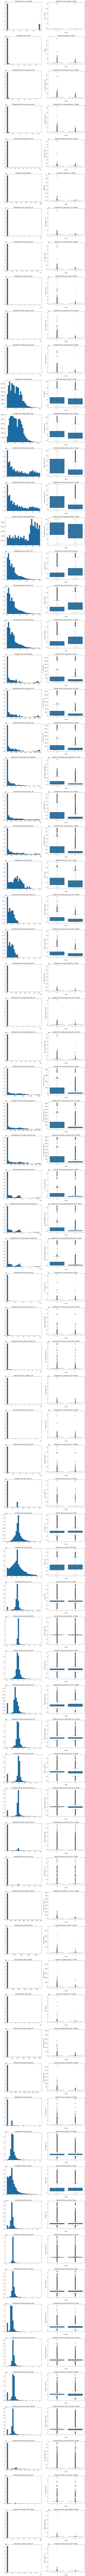

In [26]:

# Suponiendo que 'numericas' es una lista con los nombres de las variables numéricas
# Y 'target' es la variable que quieres comparar (0 o 1)

# Crear número de filas y columnas dinámicas para acomodar las gráficas
n = len(numericas)
ncols = 2  # Una columna para el histograma y otra para el boxplot
nrows = n  # Una fila por cada variable numérica

# Crear una figura con subgráficas ajustadas
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5 * n))

# Para cada variable numérica, generar los gráficos
for i, var in enumerate(numericas):
    # Histograma en la primera columna
    axes[i, 0].hist(datos_df[var], bins=30, edgecolor='black')
    axes[i, 0].set_title(f'Histograma de {var}')

    # Boxplot en la segunda columna comparando con el 'target'
    sns.boxplot(x='target', y=var, data=datos_df, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {var} vs Target')

# Ajustar espacio entre las subgráficas para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta el rectángulo para dar espacio al suptítulo

# Mostrar los gráficos
plt.show()

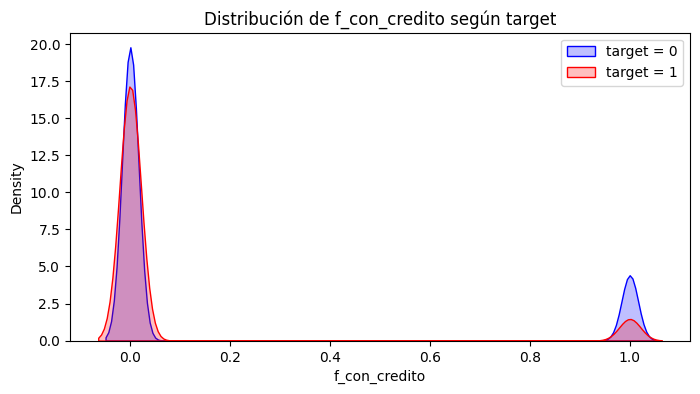

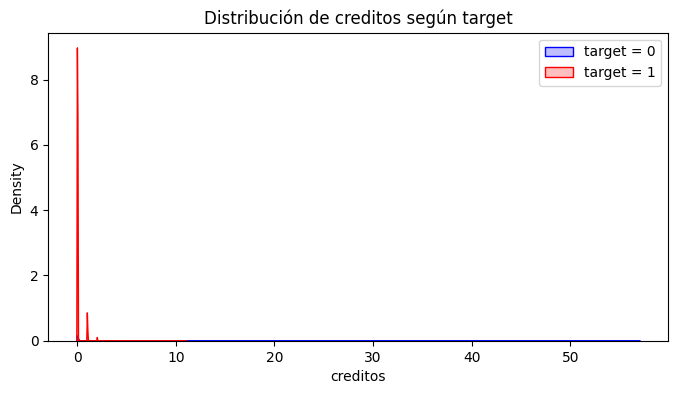

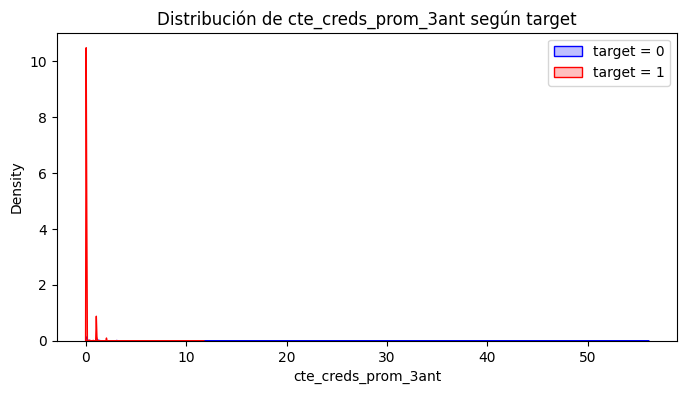

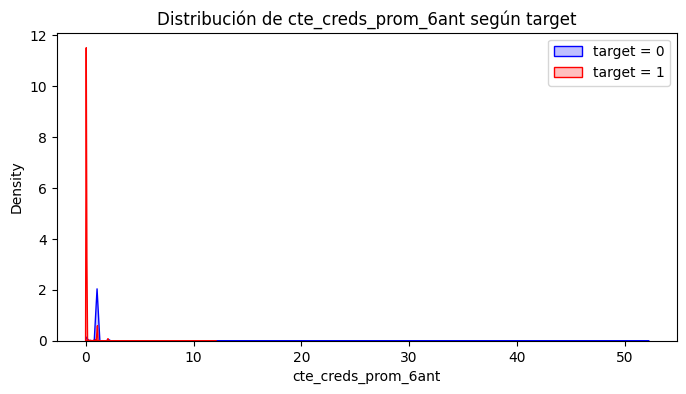

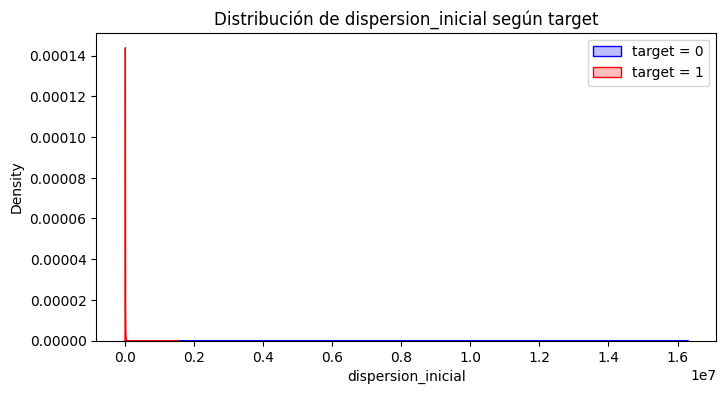

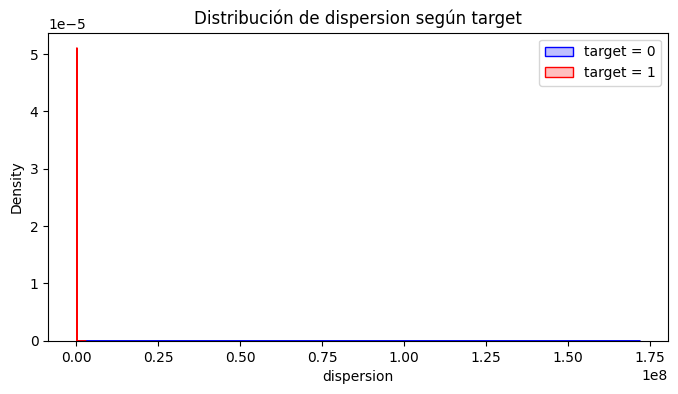

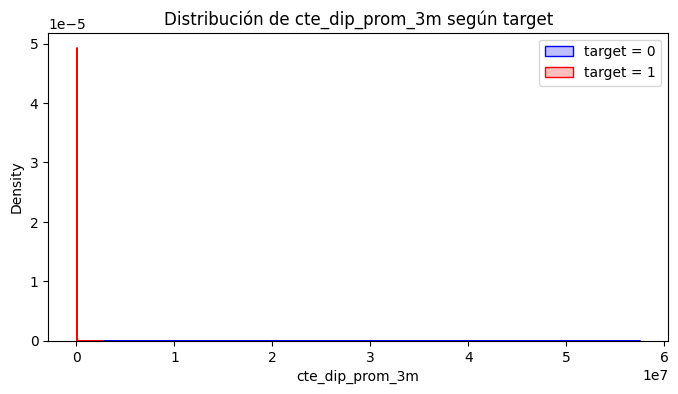

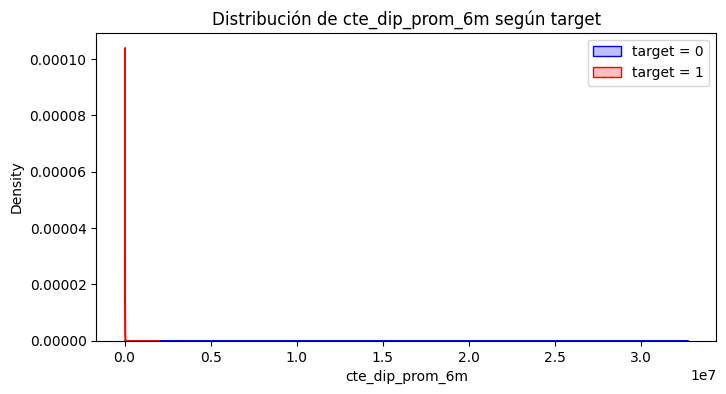

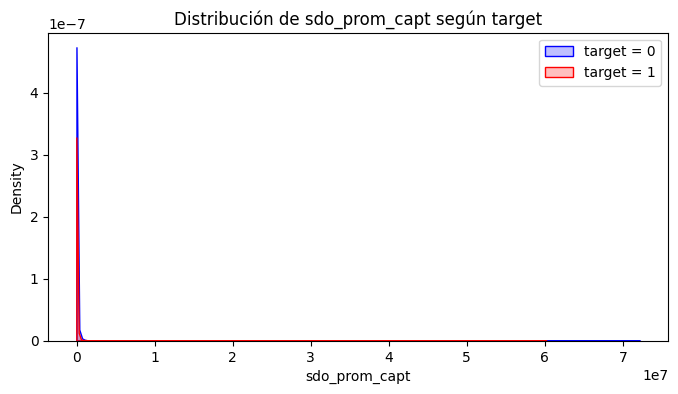

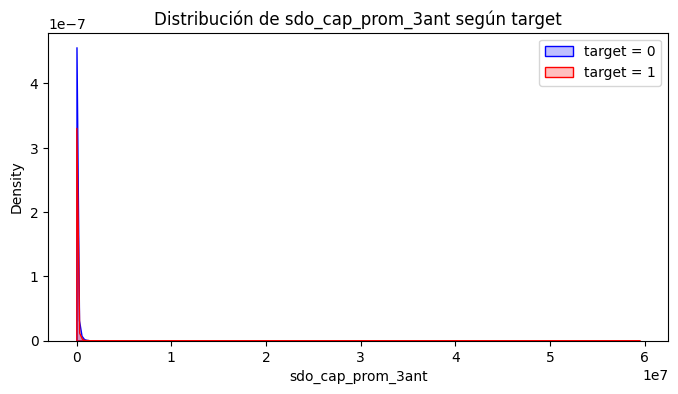

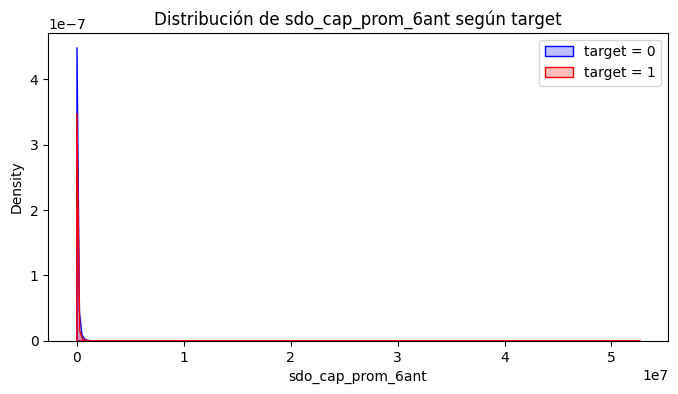

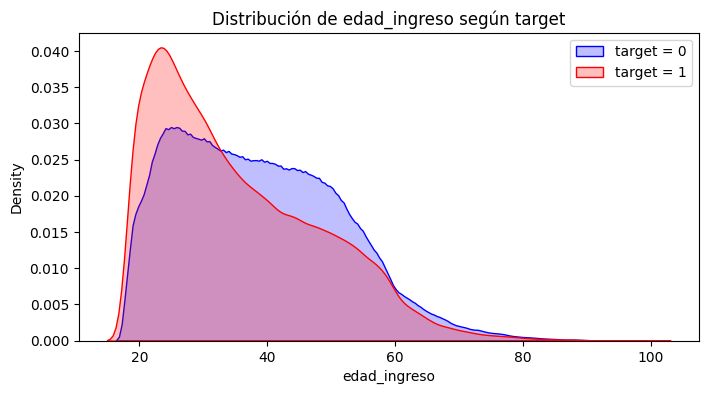

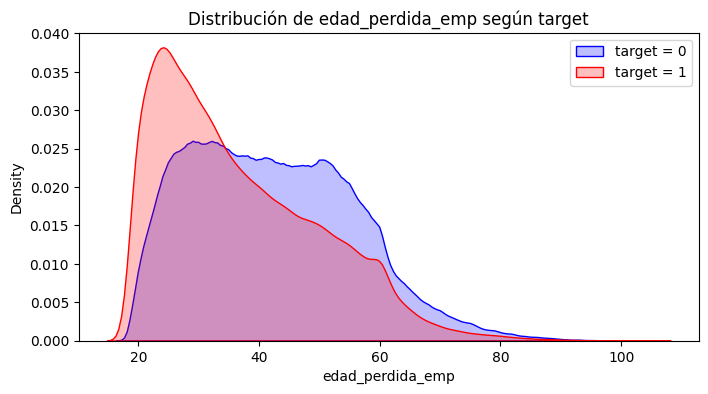

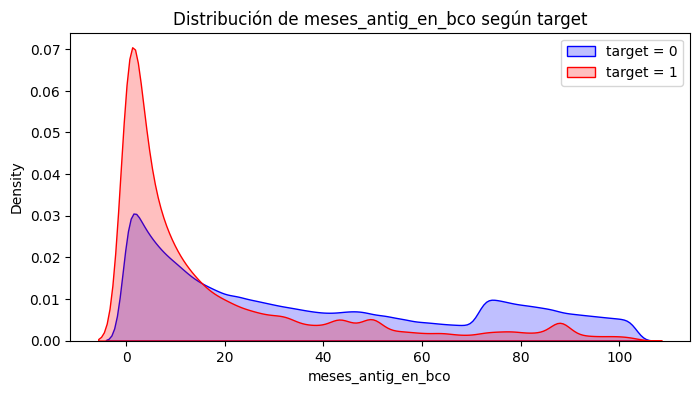

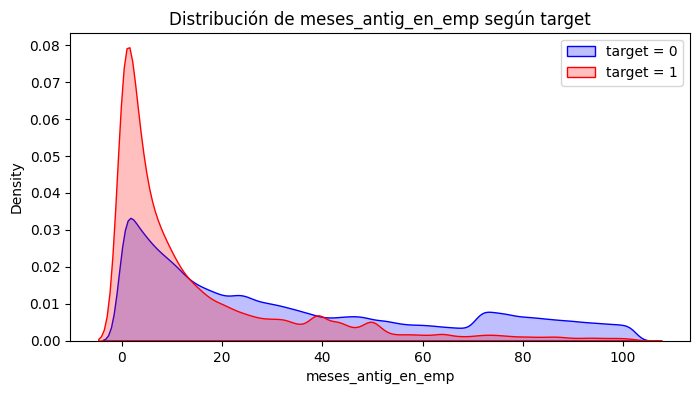

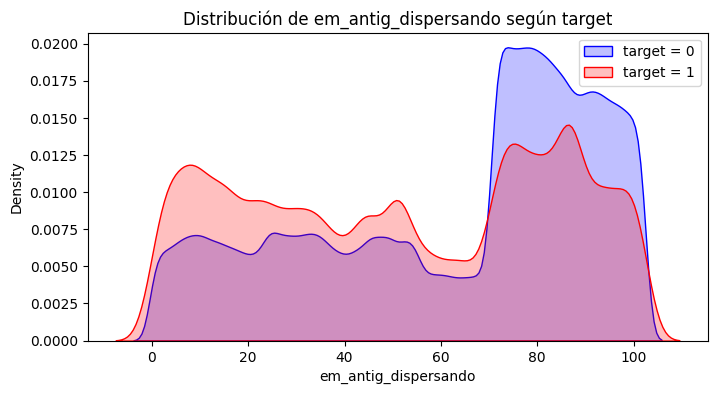

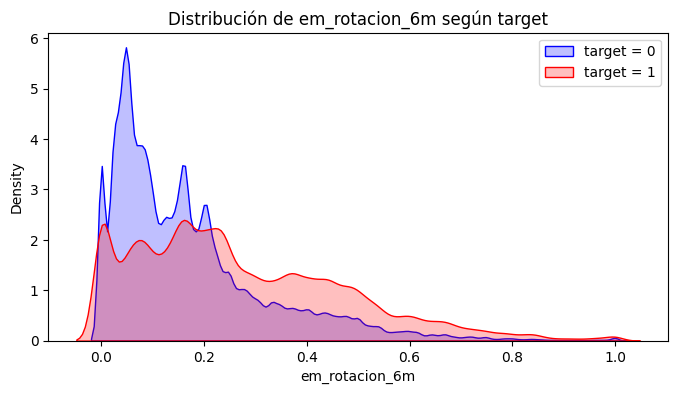

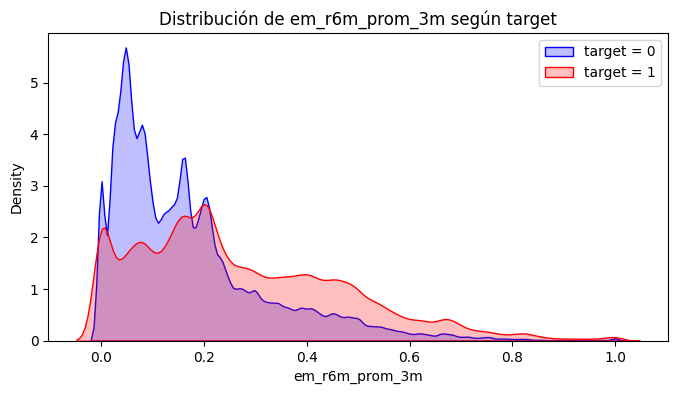

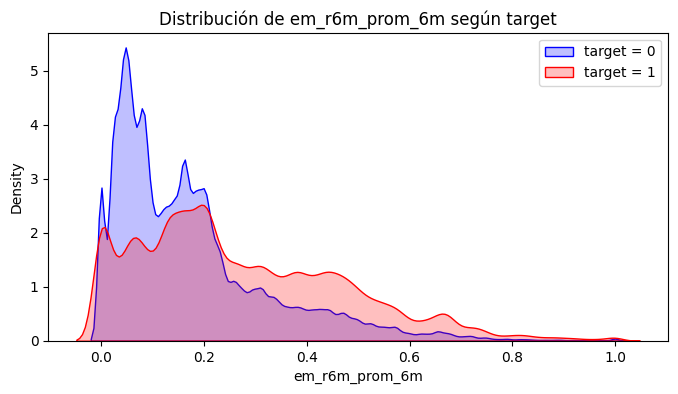

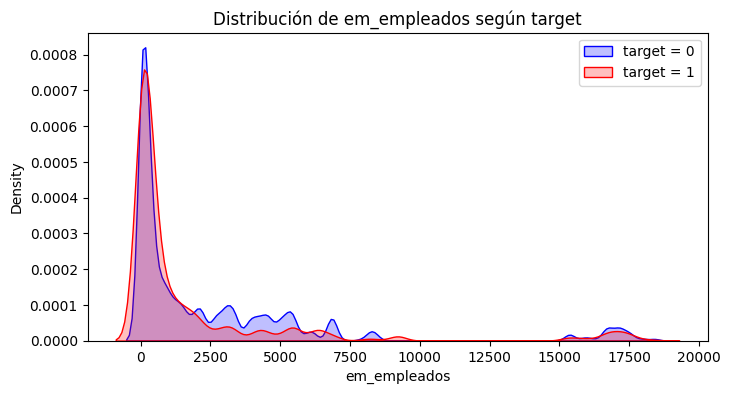

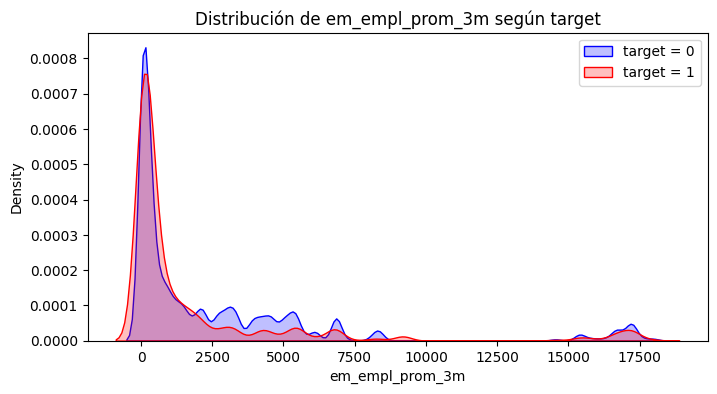

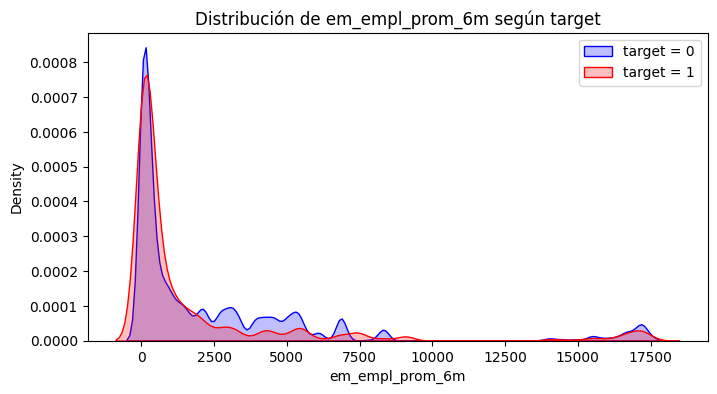

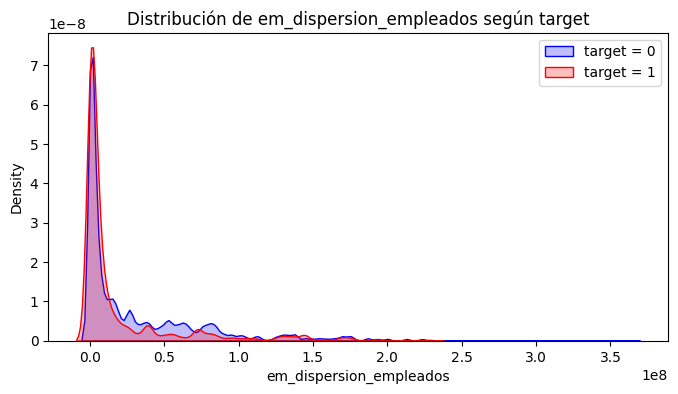

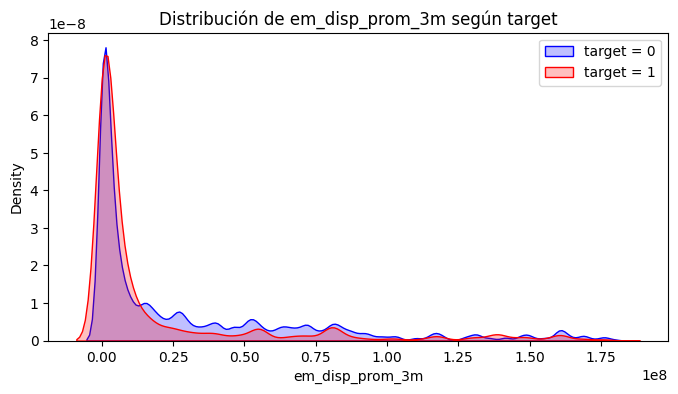

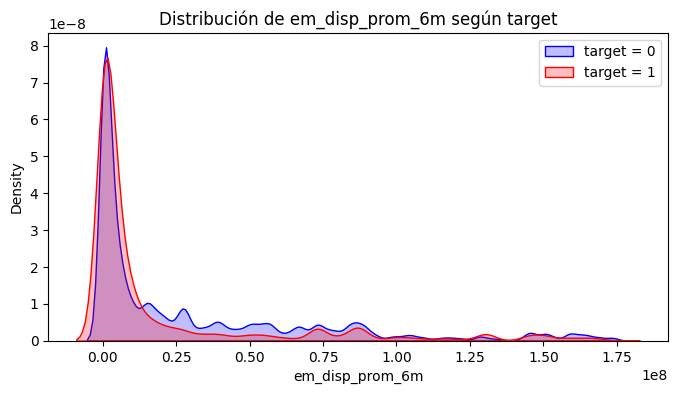

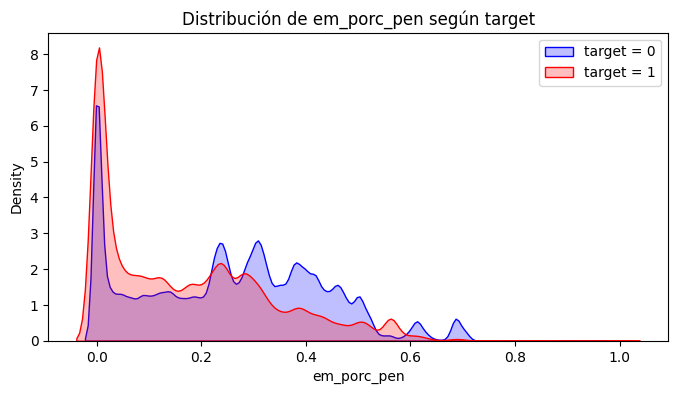

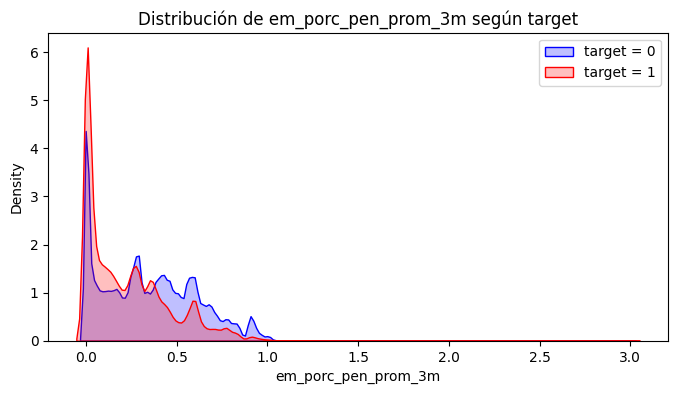

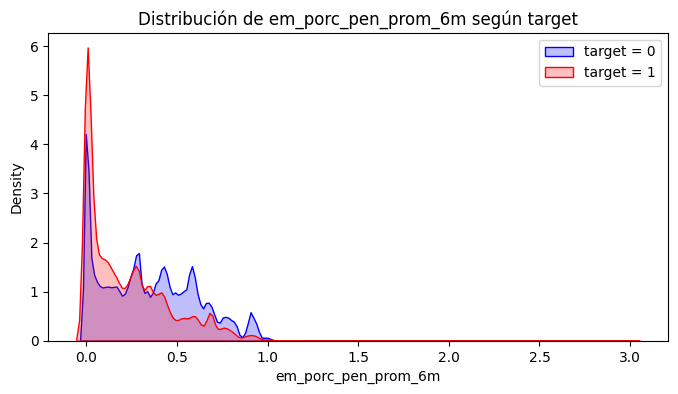

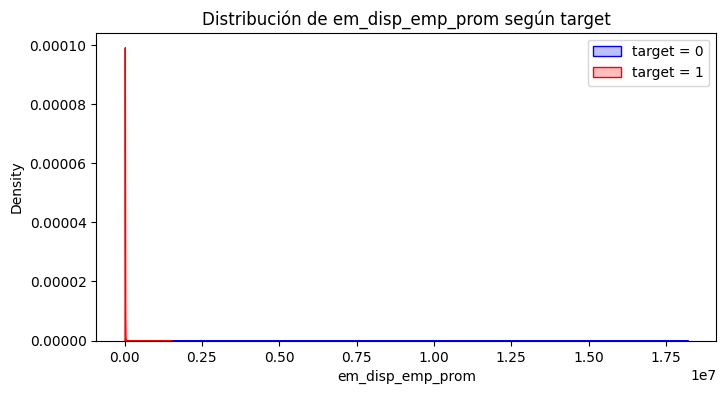

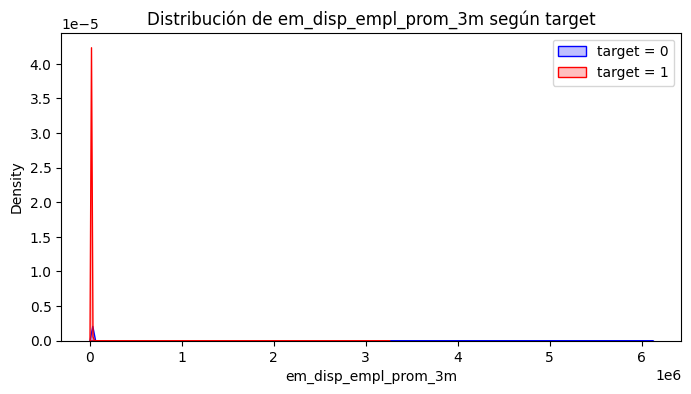

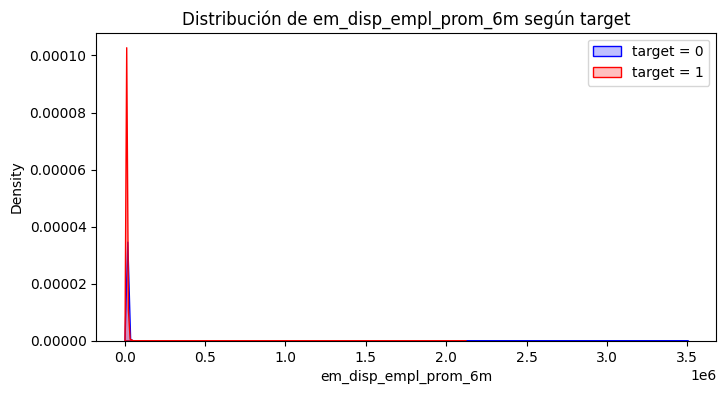

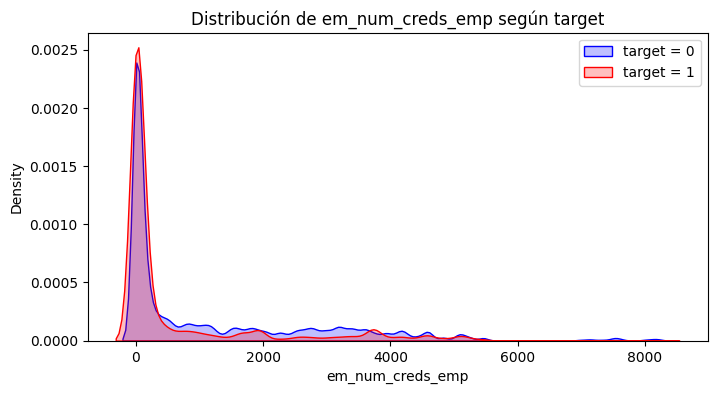

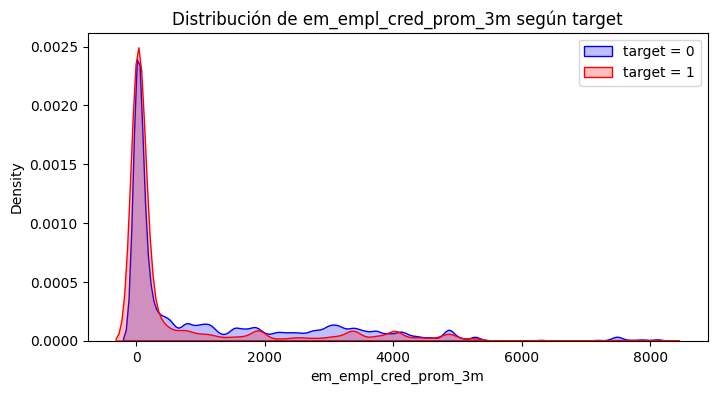

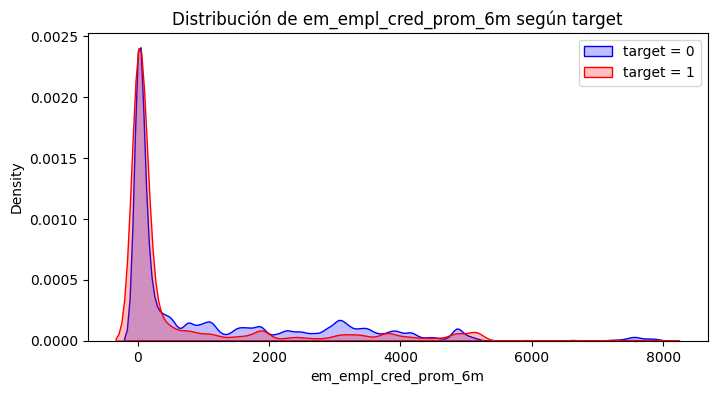

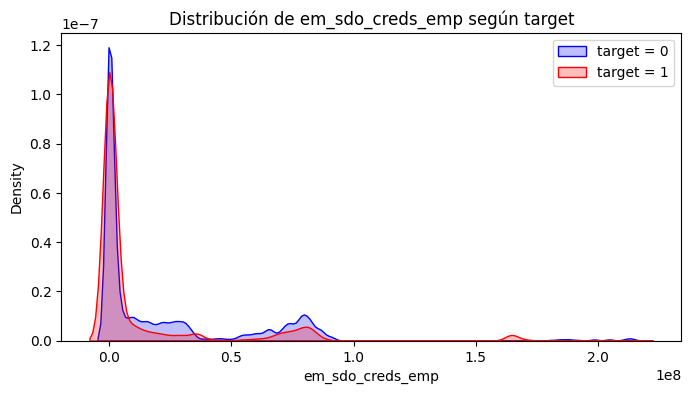

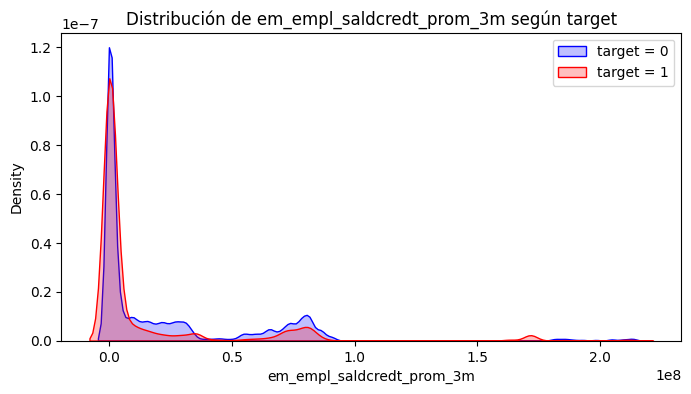

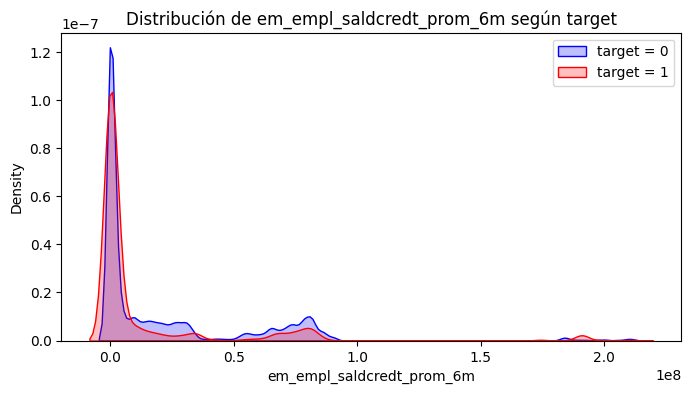

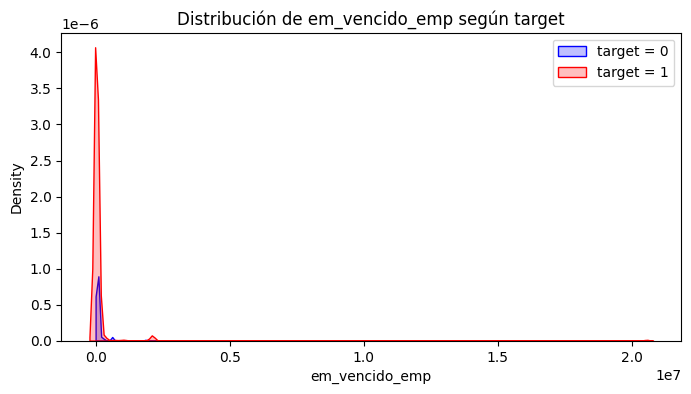

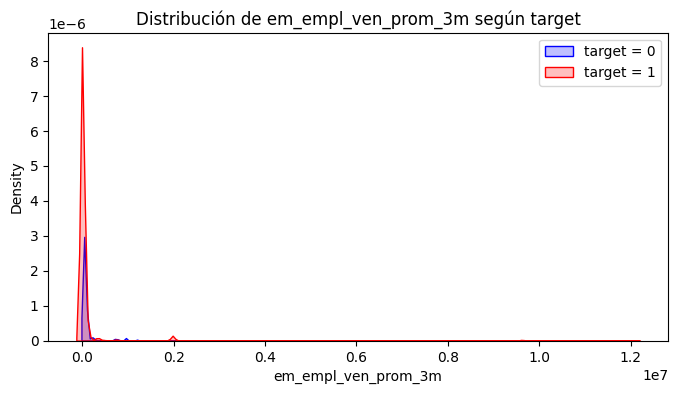

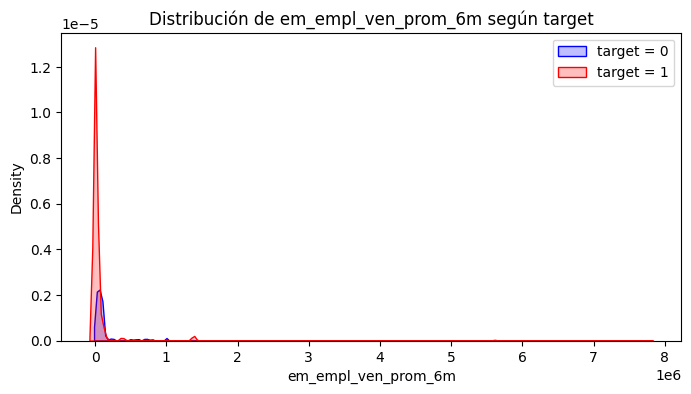

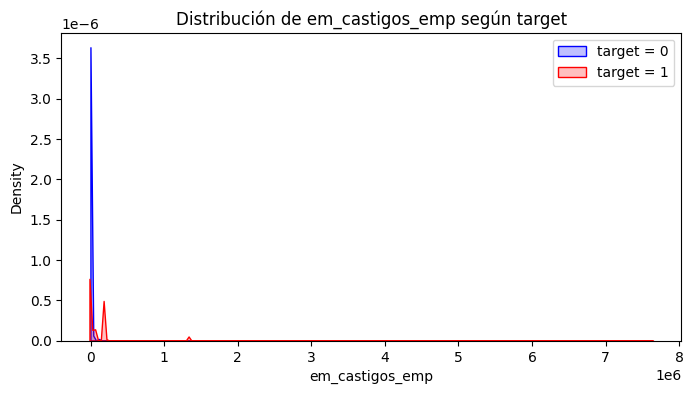

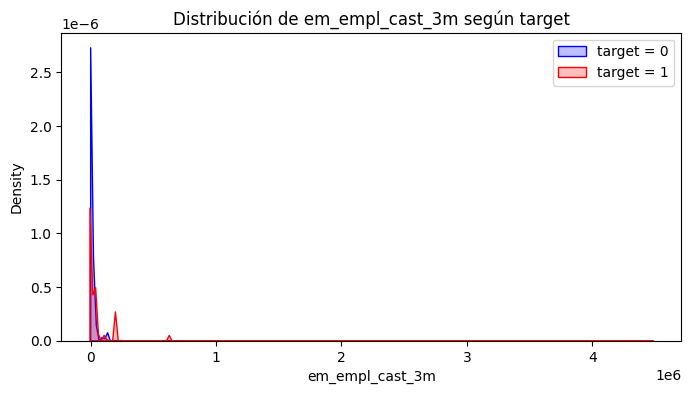

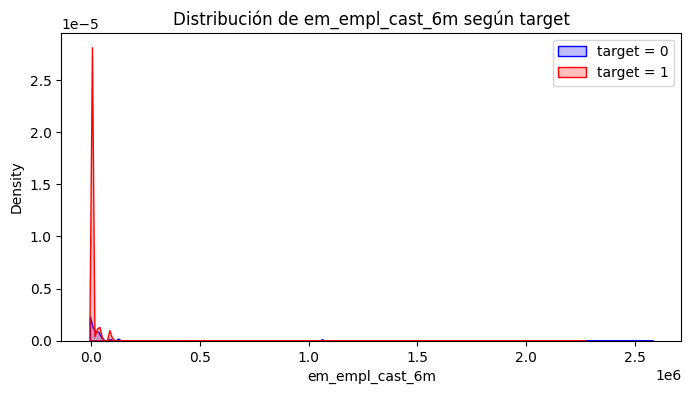

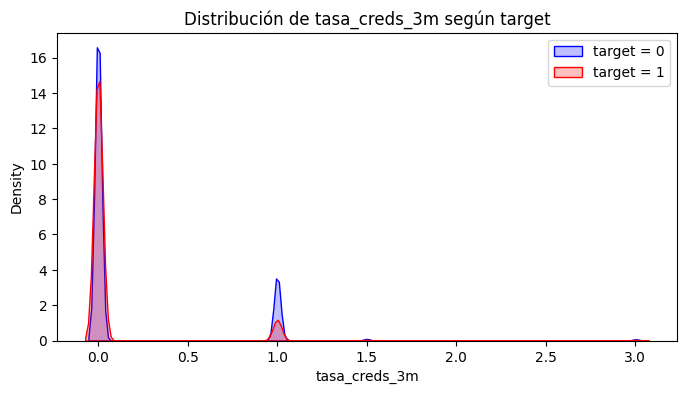

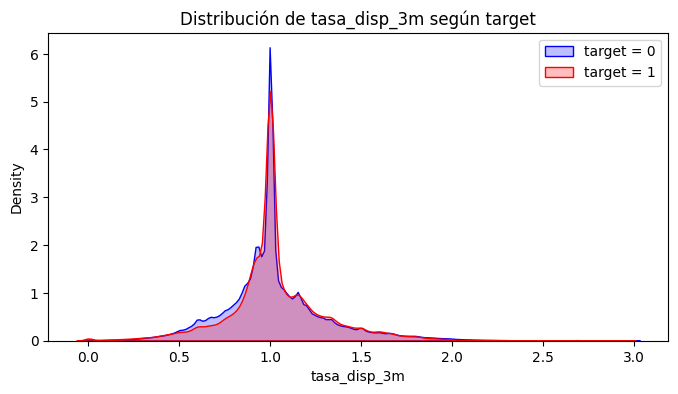

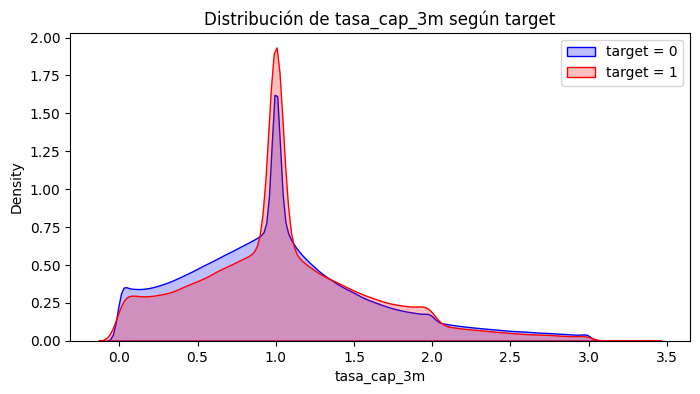

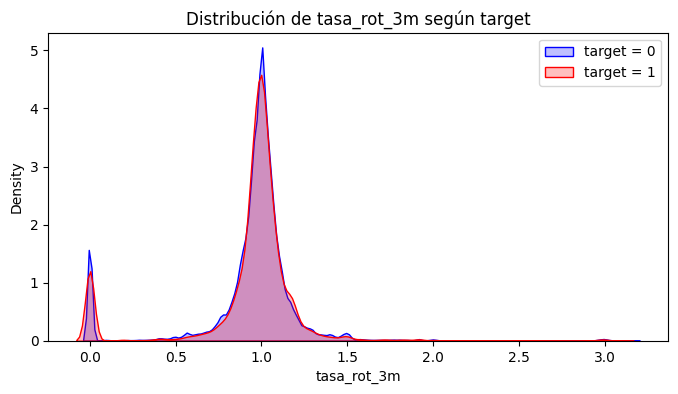

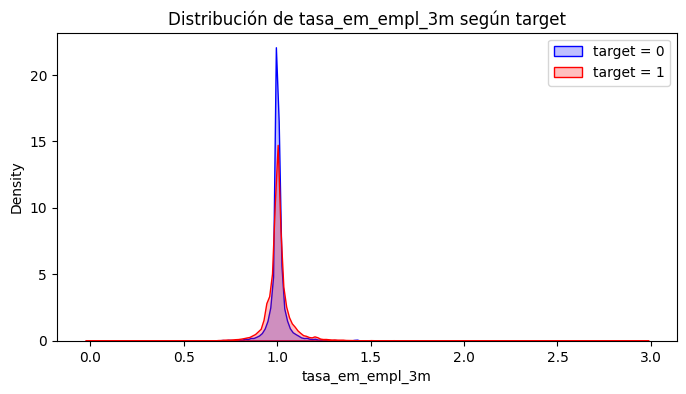

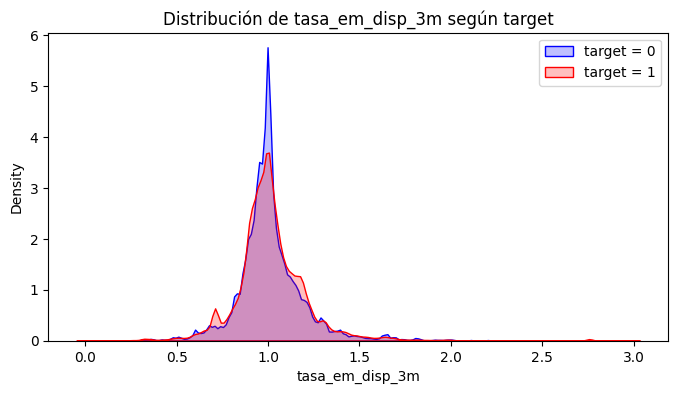

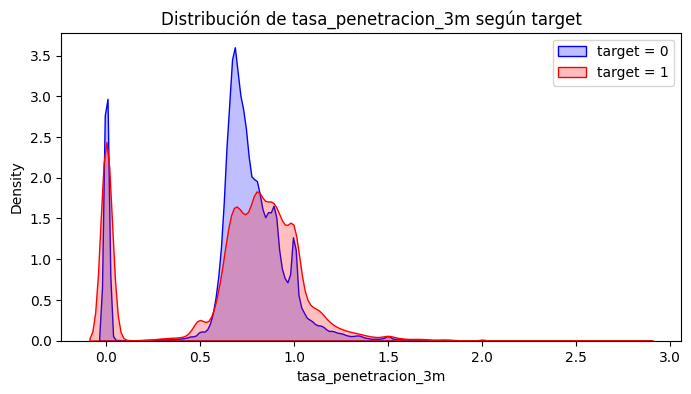

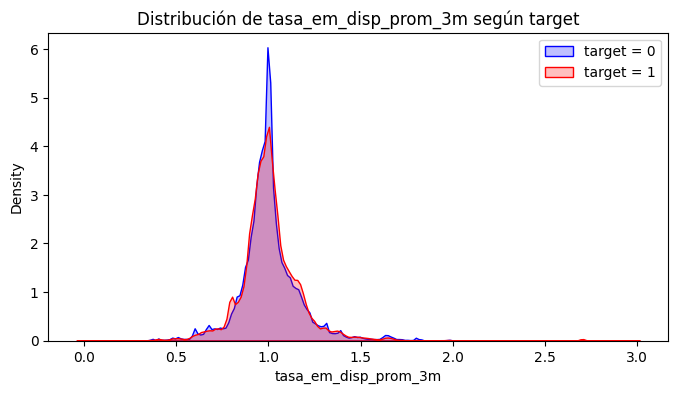

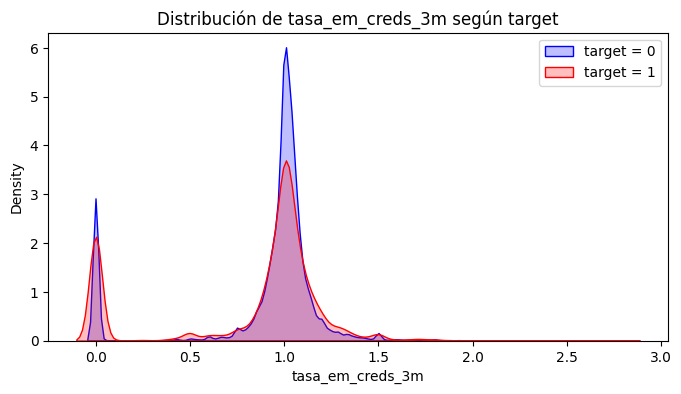

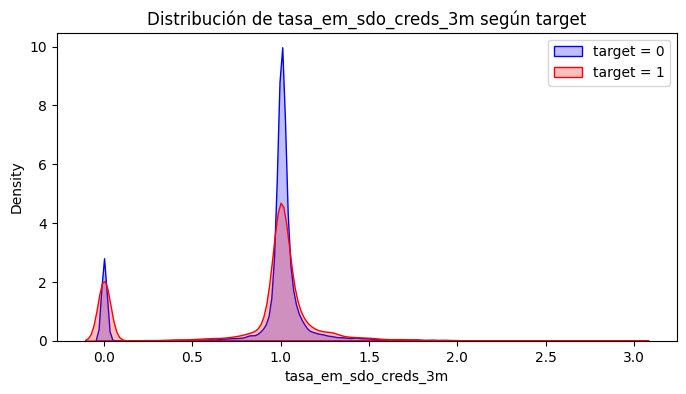

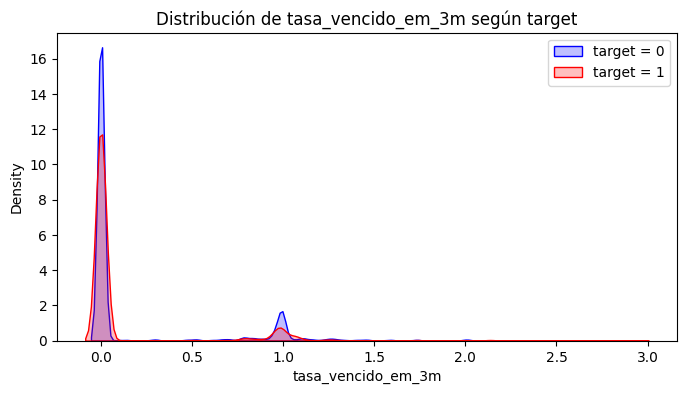

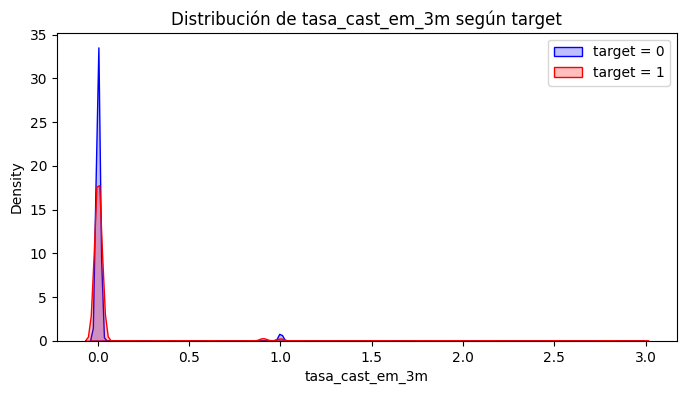

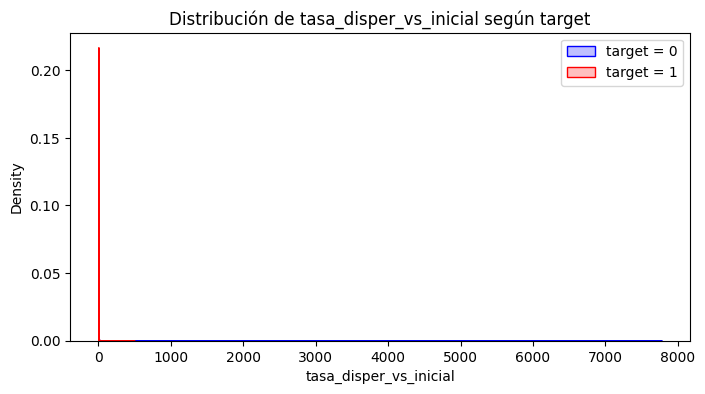

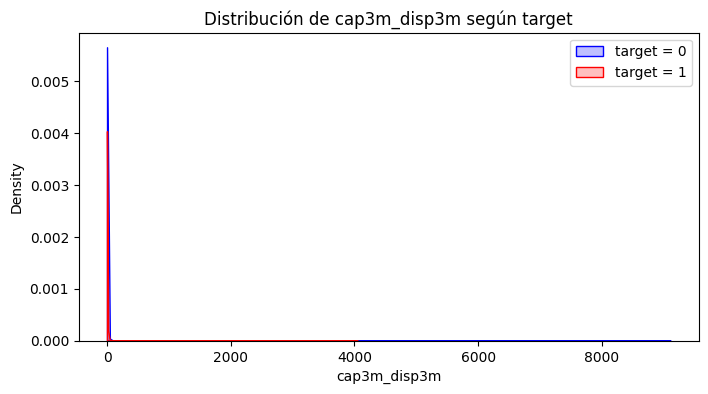

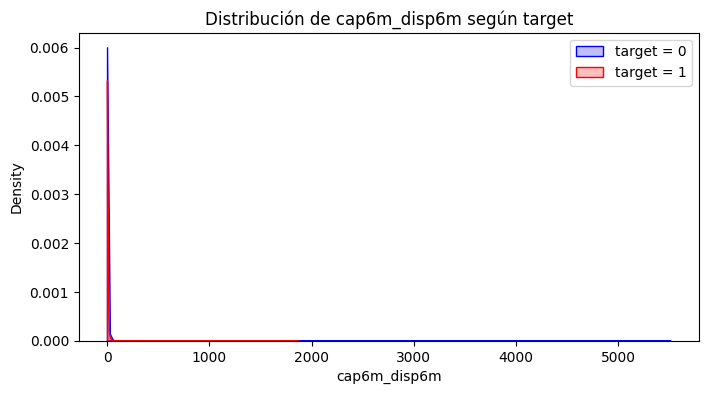

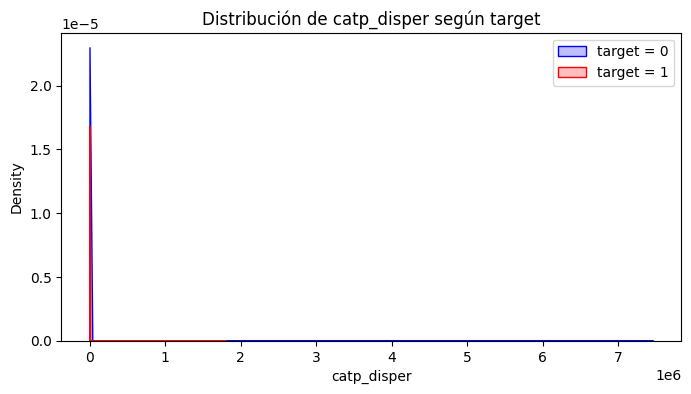

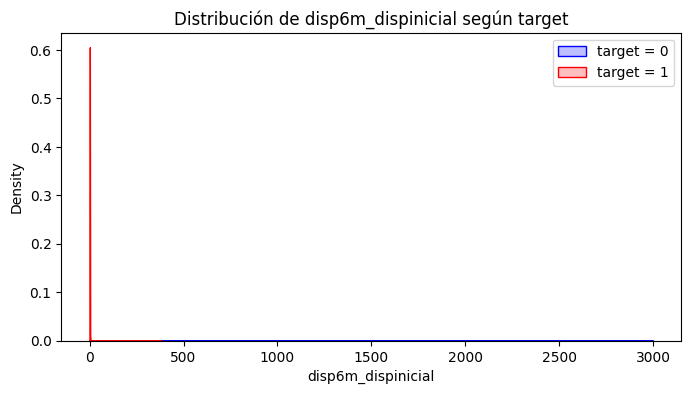

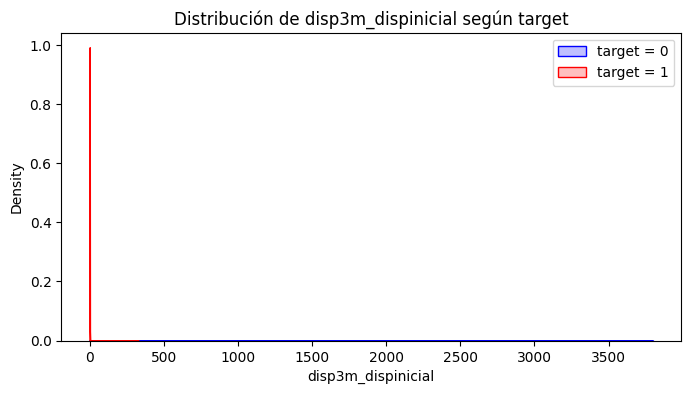

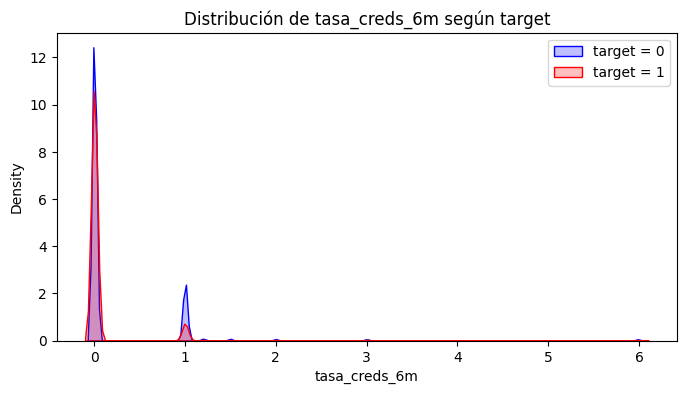

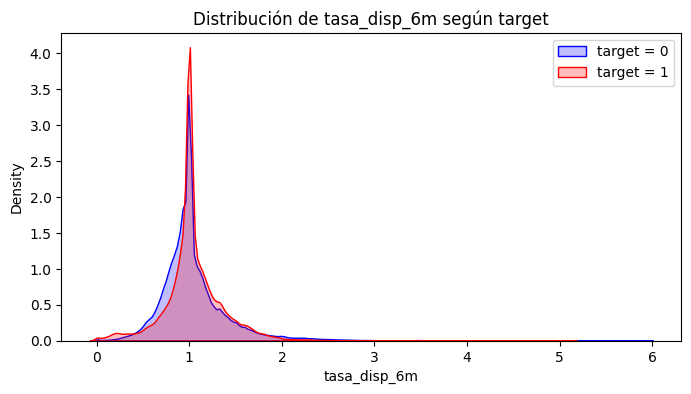

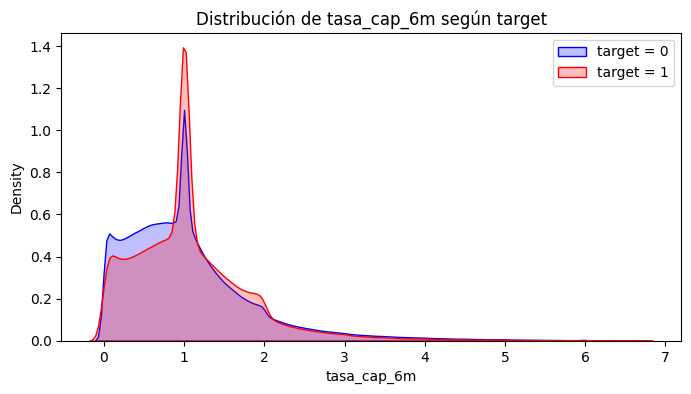

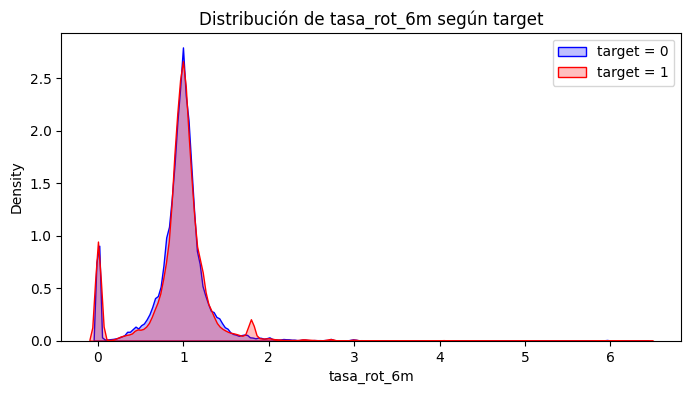

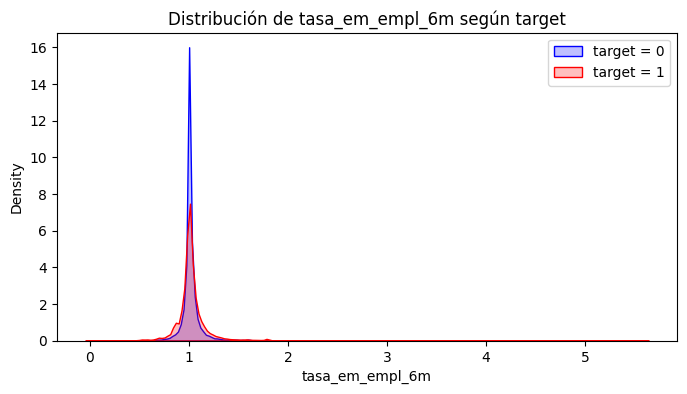

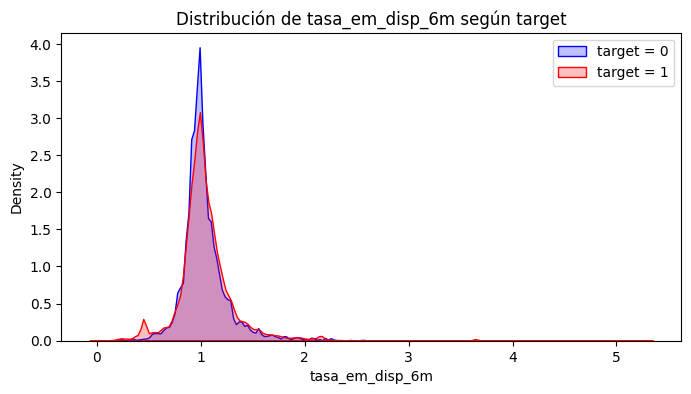

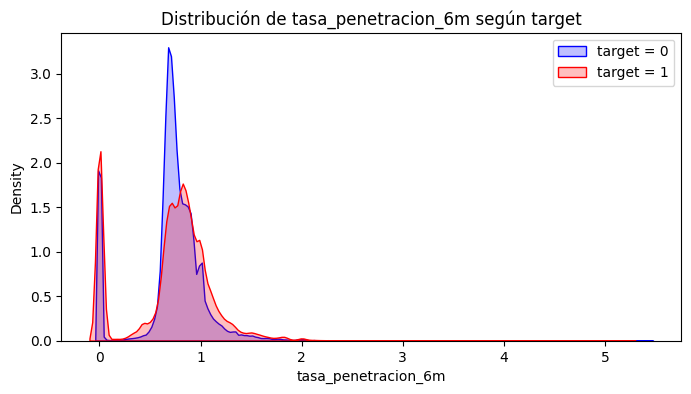

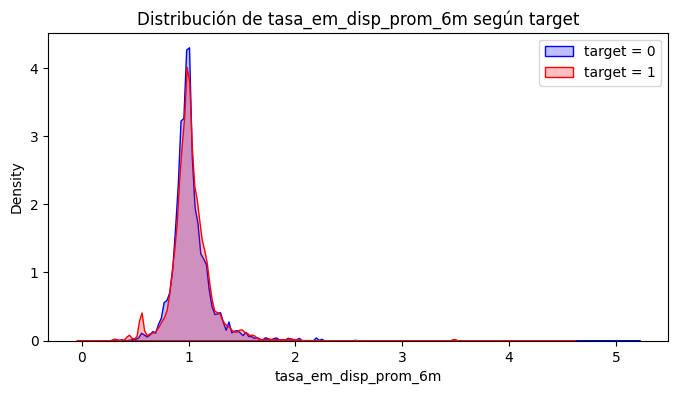

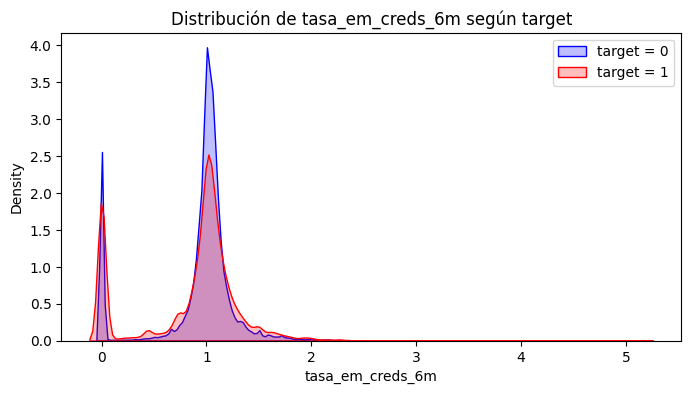

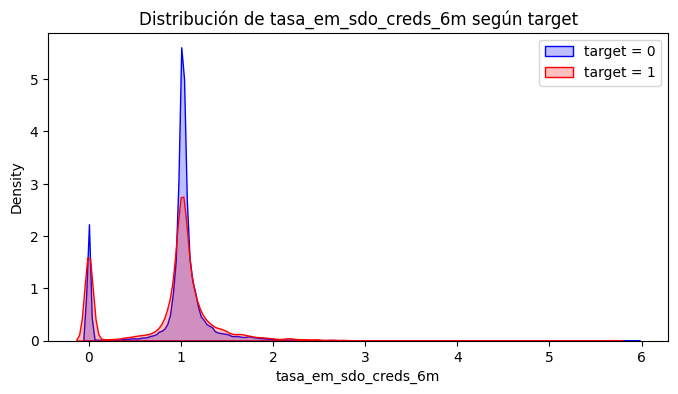

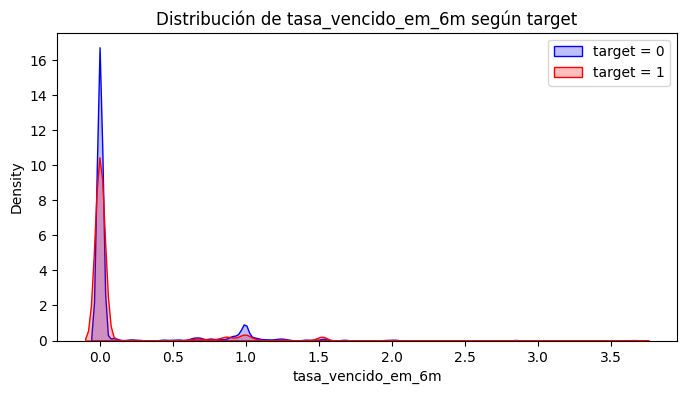

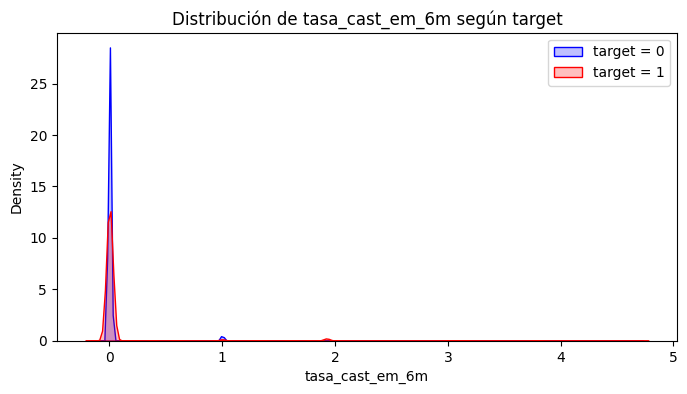

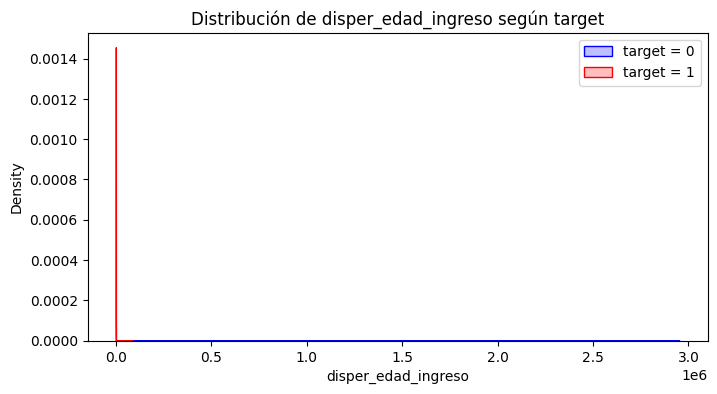

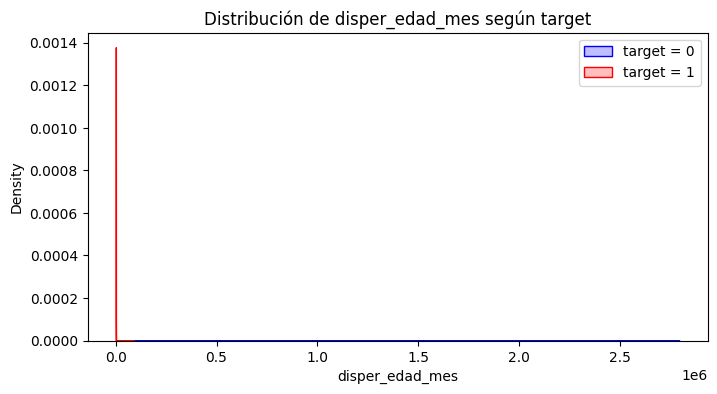

In [27]:
# Filtrar DataFrames según el valor de 'target'
df_target_0 = datos_df[datos_df['target'] == 0]
df_target_1 = datos_df[datos_df['target'] == 1]

# Crear un gráfico KDE para cada variable en 'numericas', separando por 'target'
for col in numericas:
    plt.figure(figsize=(8, 4))

    # KDE para target == 0
    sns.kdeplot(df_target_0[col], fill=True, label="target = 0", color='blue')

    # KDE para target == 1
    sns.kdeplot(df_target_1[col], fill=True, label="target = 1", color='red')

    # Título y leyenda
    plt.title(f"Distribución de {col} según target")
    plt.legend()
    plt.show()


Primero entrenaremos el modelo considerando los outliers, si no se obtiene buen rendimiento, se entrenará haciendo transformación  logarítmica, por ejemplo, o bien eliminarlos.

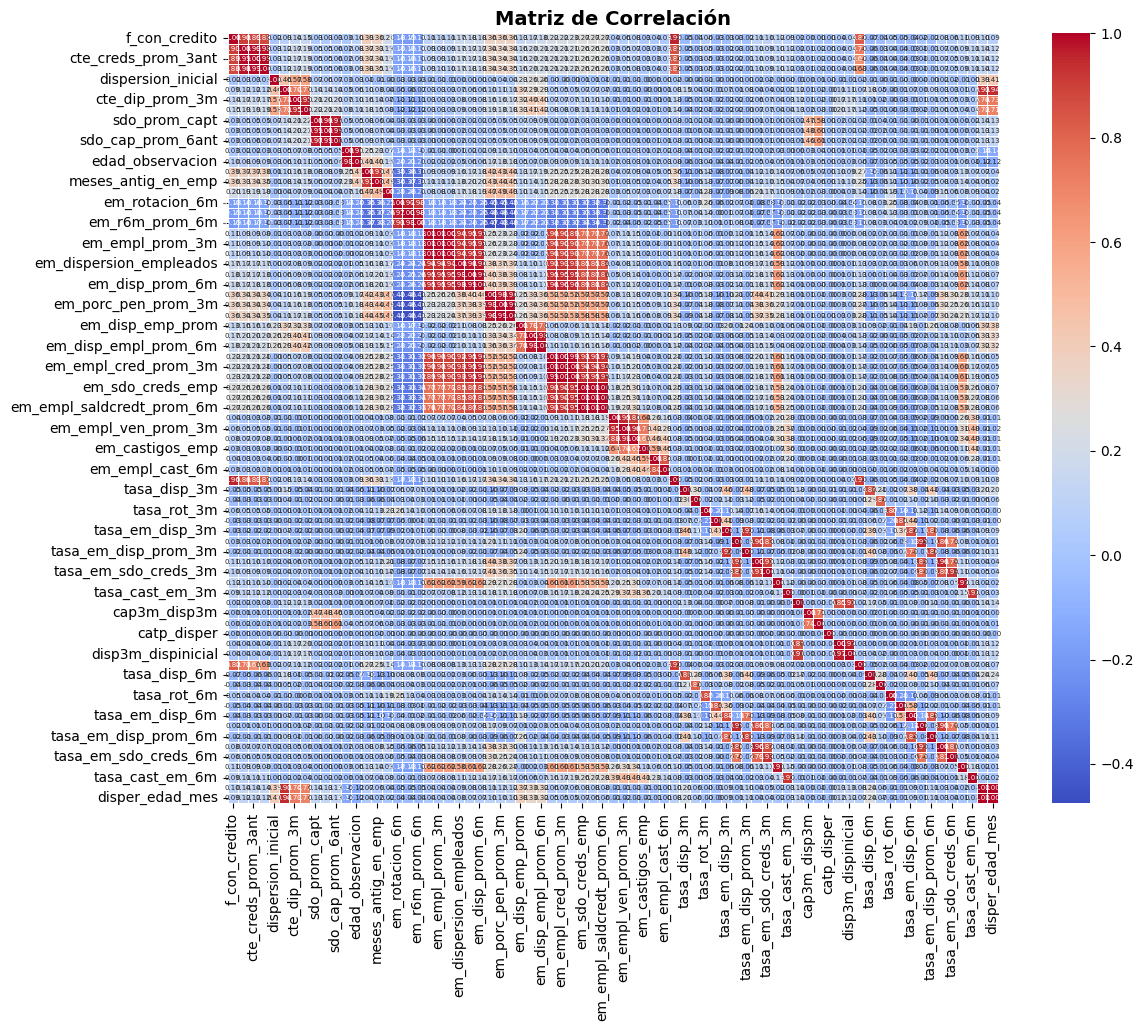

In [31]:
#Correlación de variables numéricas
corr = datos_df[numericas].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, cbar=True, annot_kws={"size": 5})

#sns.heatmap(round(datos_df.corr(),2),annot=True)

plt.title("Matriz de Correlación", fontsize=14, fontweight='bold')
plt.show()

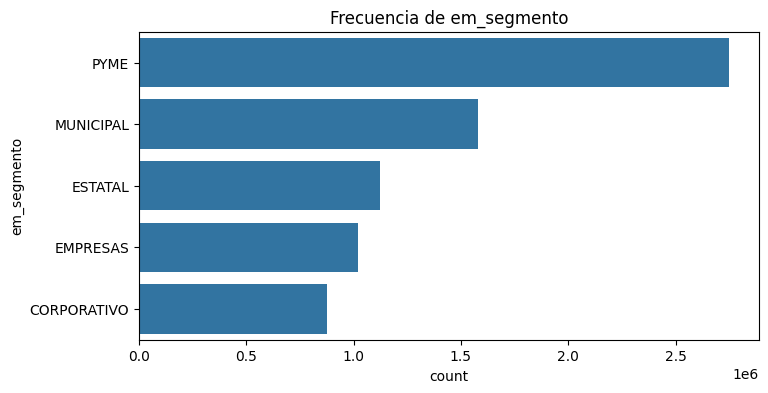

La columna em_tipo_gob no está en el DataFrame


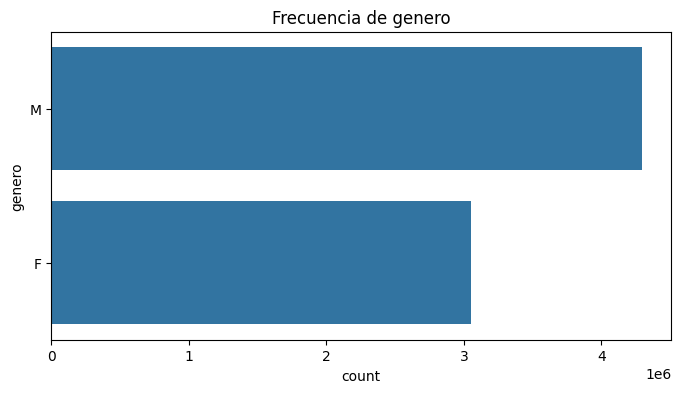

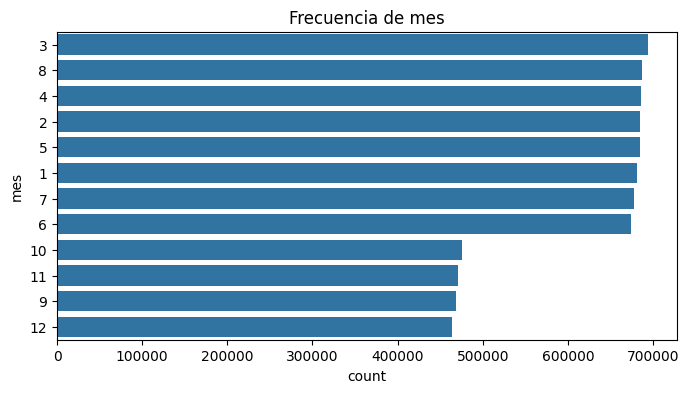

In [29]:
# Gráficos de barras para variables categóricas

for col in categoricas:
    if col in datos_df.columns:  # Verifica que la columna existe antes de graficar
        plt.figure(figsize=(8, 4))
        sns.countplot(y=datos_df[col], order=datos_df[col].value_counts().index)
        plt.title(f"Frecuencia de {col}")
        plt.show()
    else:
        print(f"La columna {col} no está en el DataFrame")

In [35]:
categoricas = ['em_segmento', 'genero', 'mes']

In [36]:
datos_df[categoricas].describe(include="object").T

count unique   top    freq
em_segmento  1024181      5  PYME  433597
genero       1024181      2     M  598606
mes          1024181     12     5  128374


Análisis de la columna: em_segmento
Frecuencia:
 em_segmento
PYME           634051
MUNICIPAL      295203
EMPRESAS       241123
ESTATAL        219401
CORPORATIVO    167553
Name: count, dtype: int64
Porcentaje:
 em_segmento
PYME           40.713952
MUNICIPAL      18.955700
EMPRESAS       15.483093
ESTATAL        14.088270
CORPORATIVO    10.758984
Name: proportion, dtype: float64


<ipython-input-38-296df5b64158>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col_cat, data=datos_df, palette="pastel")


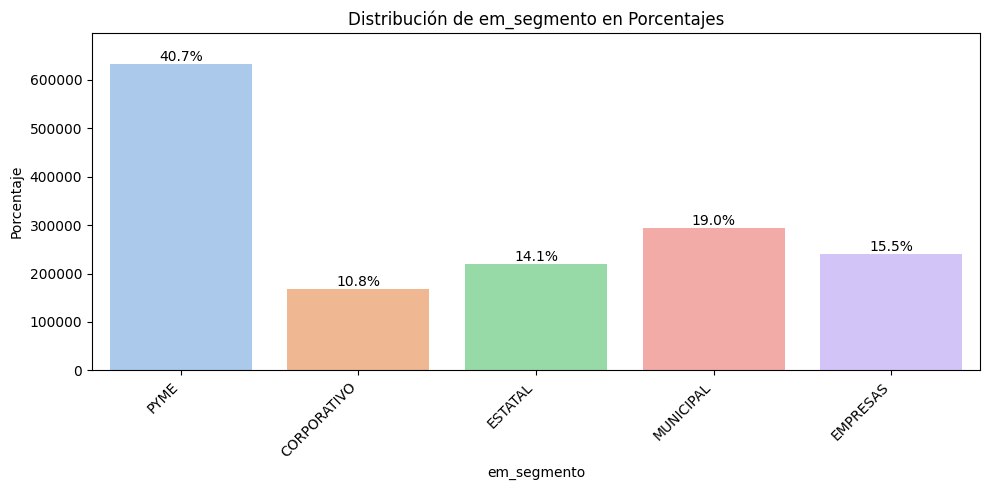


Análisis de la columna: genero
Frecuencia:
 genero
M    904197
F    653134
Name: count, dtype: int64
Porcentaje:
 genero
M    58.060682
F    41.939318
Name: proportion, dtype: float64


<ipython-input-38-296df5b64158>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col_cat, data=datos_df, palette="pastel")


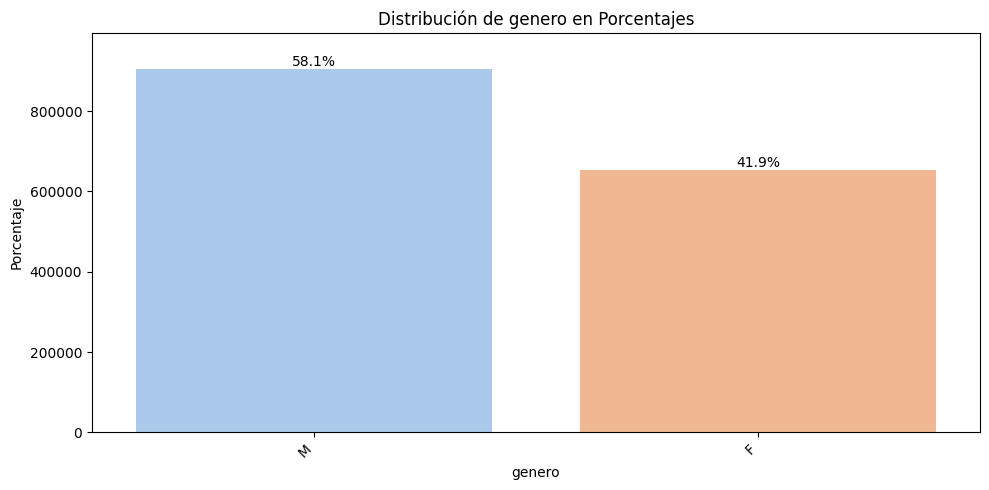


Análisis de la columna: mes
Frecuencia:
 mes
5     194838
3     188032
4     186877
7     185937
1     183610
2     183575
6     182865
8     179093
11     20463
10     19571
12     18362
9      14108
Name: count, dtype: int64
Porcentaje:
 mes
5     12.511020
3     12.073991
4     11.999825
7     11.939466
1     11.790043
2     11.787796
6     11.742205
8     11.499996
11     1.313979
10     1.256701
12     1.179069
9      0.905909
Name: proportion, dtype: float64


<ipython-input-38-296df5b64158>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col_cat, data=datos_df, palette="pastel")


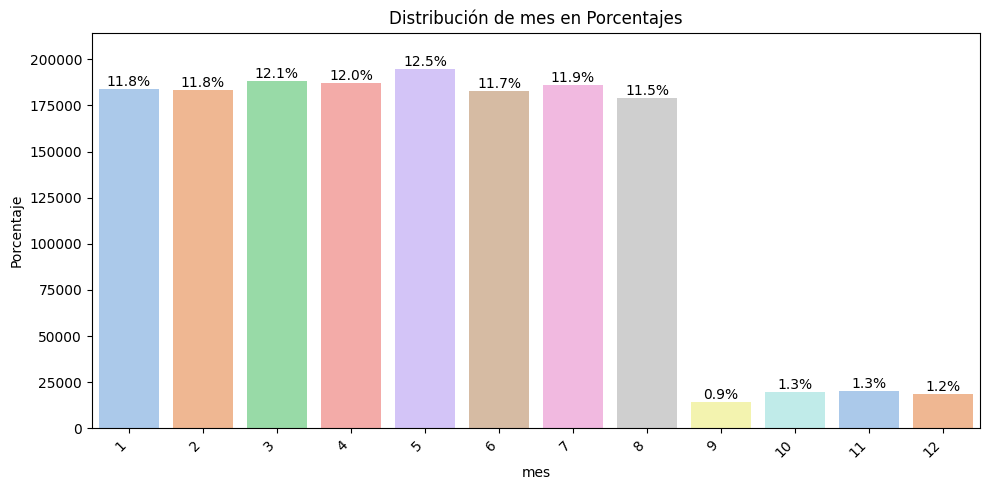

In [38]:
for col_cat in categoricas:
    plt.figure(figsize=(10, 5))  # Ajustar tamaño de la figura

    # Calcular frecuencia y porcentaje
    frecuencia = datos_df[col_cat].value_counts()
    porcentaje = datos_df[col_cat].value_counts(normalize=True) * 100  # Convertir a porcentaje

    print(f"\nAnálisis de la columna: {col_cat}")
    print("Frecuencia:\n", frecuencia)
    print("Porcentaje:\n", porcentaje)

    # Gráfico de barras con proporciones
    ax = sns.countplot(x=col_cat, data=datos_df, palette="pastel")

    # Agregar etiquetas de porcentaje sobre las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height()/len(datos_df)*100:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f"Distribución de {col_cat} en Porcentajes")
    plt.ylabel("Porcentaje")
    plt.xlabel(col_cat)

    # Ajuste para evitar que los nombres de las categorías se encimen
    plt.xticks(rotation=45, ha="right")  # Rota etiquetas y las alinea a la derecha si es necesario

    plt.ylim(0, max(frecuencia) * 1.1)  # Ajuste de escala para etiquetas
    plt.tight_layout()  # Optimiza el espacio de la gráfica
    plt.show()

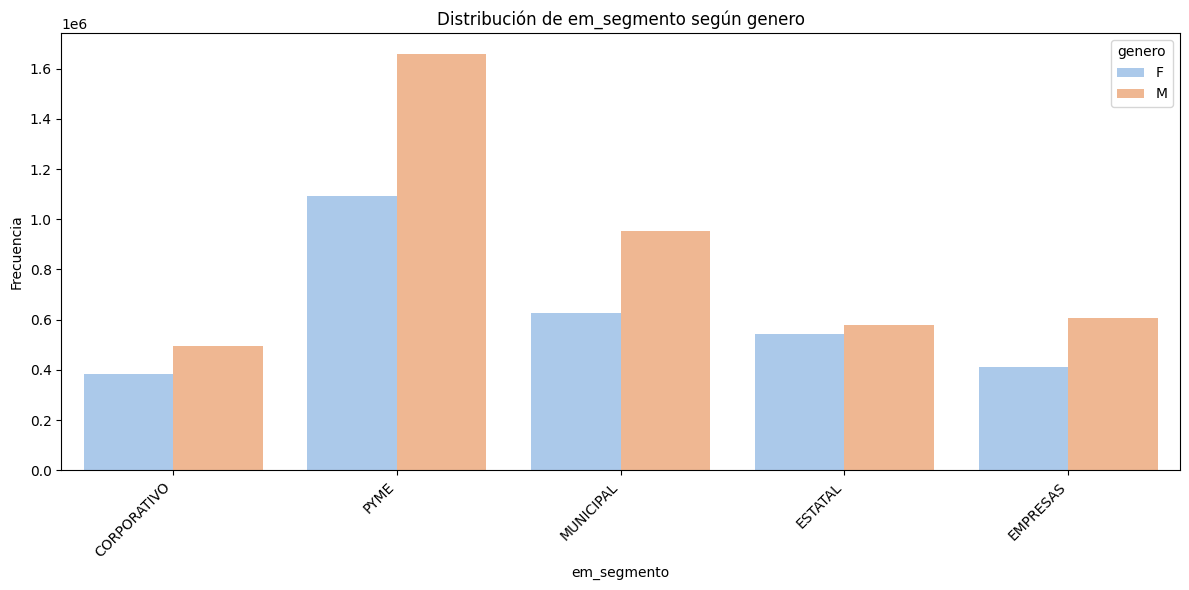

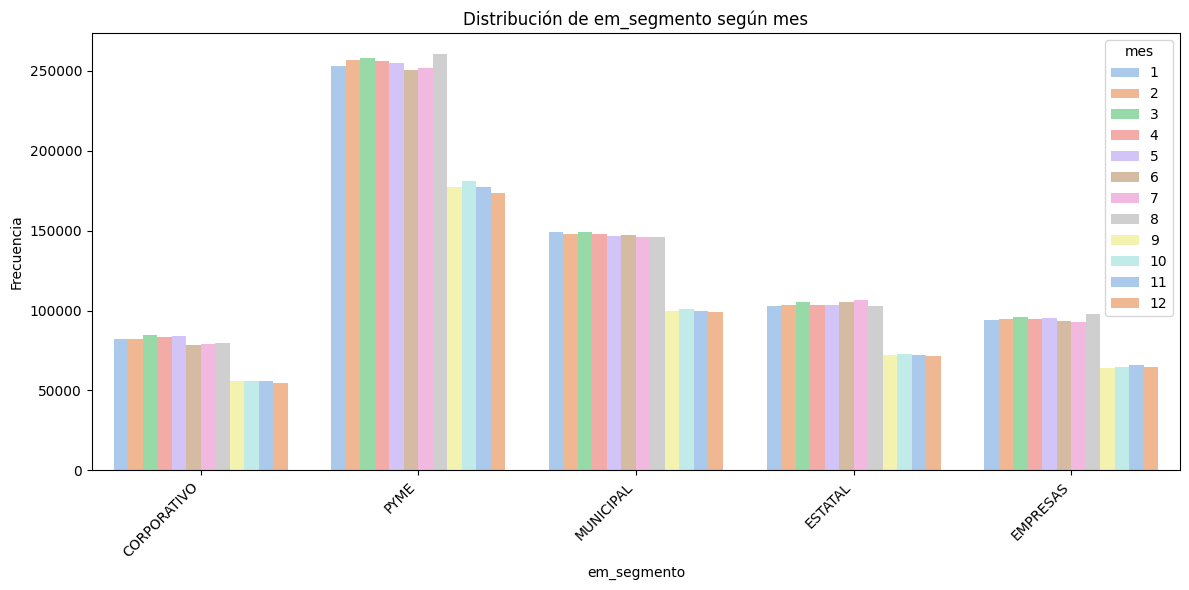

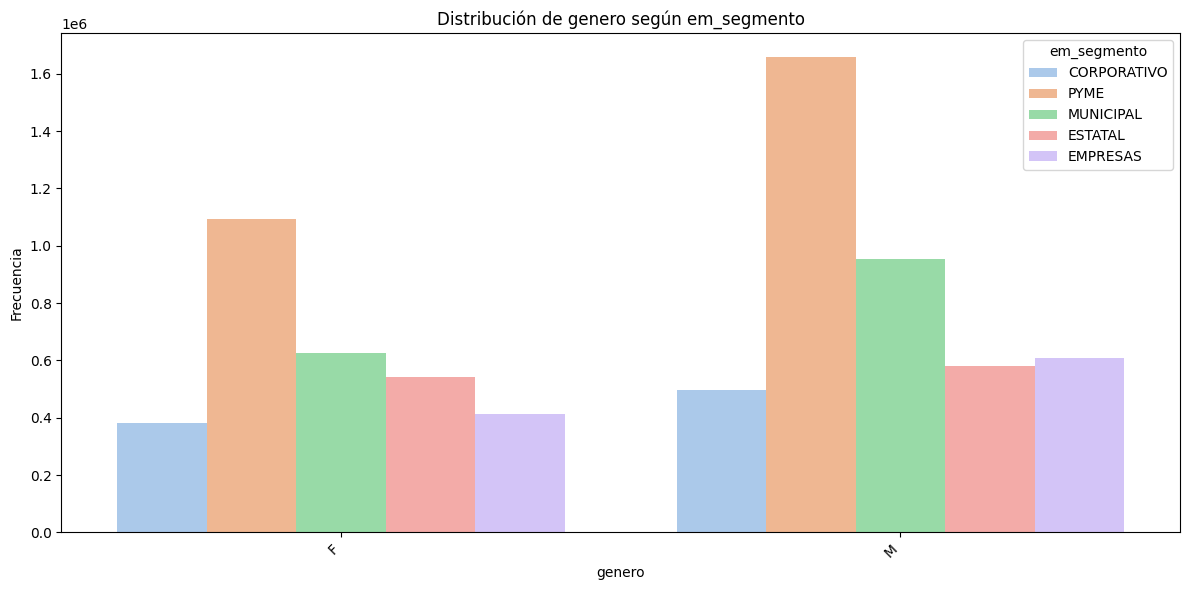

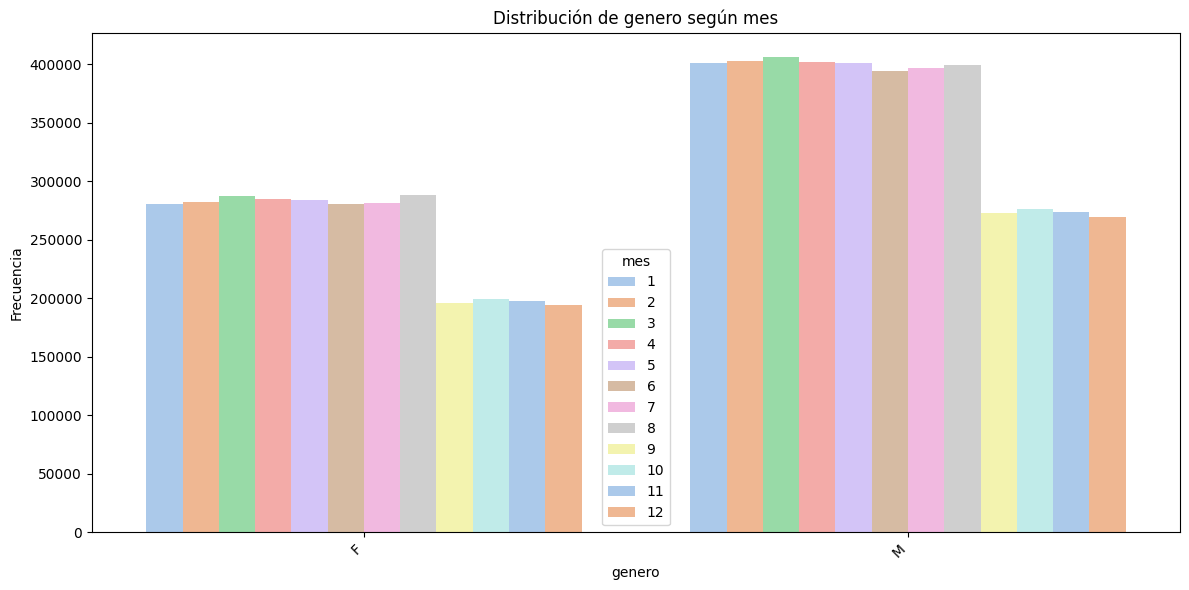

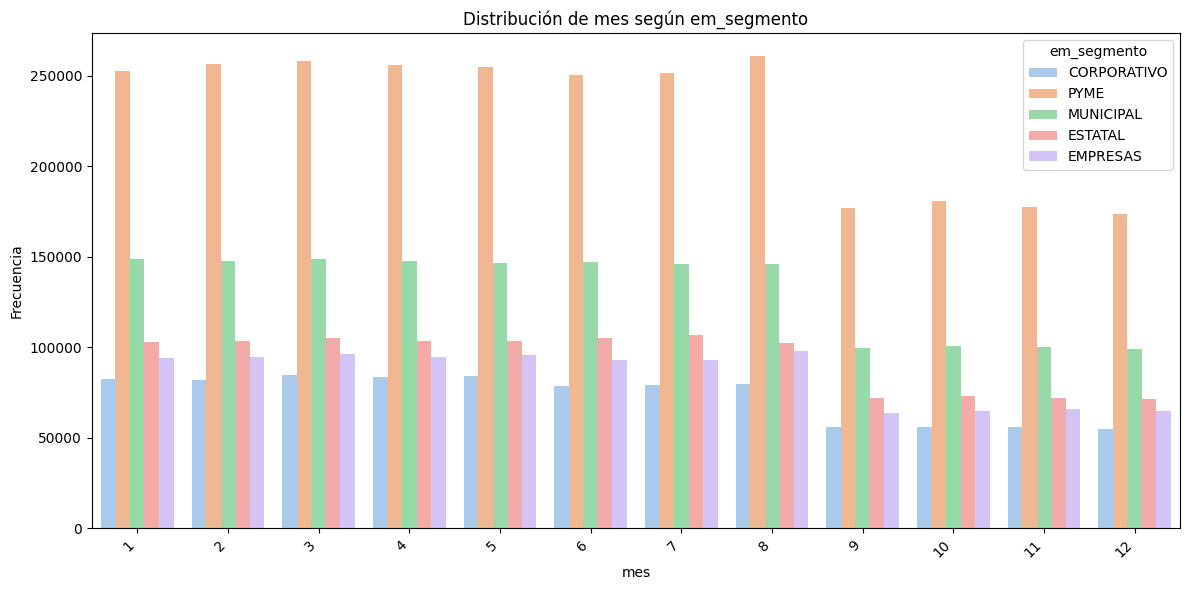

In [ ]:
# Análisis bivariado con gráfico de barras


for columna_1 in categoricas:
    for columna_2 in categoricas:
        if columna_1 != columna_2:
            plt.figure(figsize=(12, 6))  # Ajuste del tamaño de la figura

            ax = sns.countplot(x=columna_1, hue=columna_2, data=datos_df, palette="pastel")

            plt.title(f"Distribución de {columna_1} según {columna_2}")

            # Rota las etiquetas del eje X si hay muchas categorías
            plt.xticks(rotation=45, ha="right")

            plt.xlabel(columna_1)
            plt.ylabel("Frecuencia")

            # Ajusta automáticamente la disposición de los elementos en la figura
            plt.tight_layout()

            plt.show()

## **Ingeniería de Características**

La **ingeniería de características** (o feature engineering en inglés) es el proceso de transformar y crear nuevas características (o variables) a partir de los datos originales con el fin de mejorar el desempeño de un modelo de aprendizaje automático. Esto involucra tanto la creación de nuevas características como la transformación, selección y limpieza de las existentes para hacerlas más útiles para los algoritmos.

In [37]:
categoricas

['em_segmento', 'genero', 'mes']

Codificación de variables categóricas.

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Copia del dataframe original
df_transformed = datos_df.copy()

# Definir las columnas que deben omitirse
columnas_omitidas = ['uuid_rec', 'mes_informacion', 'target', 'f_con_credito', 'creditos',
                     'cte_creds_prom_3ant', 'cte_creds_prom_6ant']

# Eliminar columnas no deseadas
df_transformed = df_transformed.drop(columns=columnas_omitidas, errors='ignore')

# Identificación de variables
num_cols = df_transformed.select_dtypes(include=[np.number]).columns.tolist()
bin_cols = [col for col in num_cols if set(df_transformed[col].dropna().unique()).issubset({0, 1})]  # Variables binarias
num_cols = list(set(num_cols) - set(bin_cols))  # Solo numéricas (excluye binarias)

cat_cols = df_transformed.select_dtypes(exclude=[np.number]).columns.tolist()  # Variables categóricas

# Escalar variables numéricas (considerando valores negativos)
# Agregar como nota


scaler = StandardScaler()
df_transformed[num_cols] = scaler.fit_transform(df_transformed[num_cols])

# One-Hot Encoding para variables categóricas (evita alta dimensionalidad)
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Elimina una categoría para evitar colinealidad
encoded_cats = encoder.fit_transform(df_transformed[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_cols))

# Concatenar datos transformados
df_transformed = df_transformed.drop(columns=cat_cols)  # Elimina originales categóricas
df_transformed = pd.concat([df_transformed, encoded_cat_df], axis=1)  # Une one-hot


In [39]:
df_transformed.columns

Index(['dispersion_inicial', 'dispersion', 'cte_dip_prom_3m',
       'cte_dip_prom_6m', 'sdo_prom_capt', 'sdo_cap_prom_3ant',
       'sdo_cap_prom_6ant', 'edad_ingreso', 'edad_observacion',
       'meses_antig_en_bco', 'meses_antig_en_emp', 'em_antig_dispersando',
       'em_rotacion_6m', 'em_r6m_prom_3m', 'em_r6m_prom_6m', 'em_empleados',
       'em_empl_prom_3m', 'em_empl_prom_6m', 'em_dispersion_empleados',
       'em_disp_prom_3m', 'em_disp_prom_6m', 'em_porc_pen',
       'em_porc_pen_prom_3m', 'em_porc_pen_prom_6m', 'em_disp_emp_prom',
       'em_disp_empl_prom_3m', 'em_disp_empl_prom_6m', 'em_num_creds_emp',
       'em_empl_cred_prom_3m', 'em_empl_cred_prom_6m', 'em_sdo_creds_emp',
       'em_empl_saldcredt_prom_3m', 'em_empl_saldcredt_prom_6m',
       'em_vencido_emp', 'em_empl_ven_prom_3m', 'em_empl_ven_prom_6m',
       'em_castigos_emp', 'em_empl_cast_3m', 'em_empl_cast_6m',
       'tasa_creds_3m', 'tasa_disp_3m', 'tasa_cap_3m', 'tasa_rot_3m',
       'tasa_em_empl_3m', 'tasa_e

In [40]:
df_transformed.head()

dispersion_inicial  dispersion  cte_dip_prom_3m  cte_dip_prom_6m  \
0           -0.012623   -0.211442        -0.345141        -0.372604   
1           -0.064430   -0.044706         0.097549        -0.038541   
2           -0.046167   -0.226279        -0.312287        -0.294142   
3           -0.080229   -0.226139        -0.260110        -0.380713   
4            0.083545   -0.015530         0.064758         0.031688   

   sdo_prom_capt  sdo_cap_prom_3ant  sdo_cap_prom_6ant  edad_ingreso  \
0      -0.087652          -0.087059          -0.089921      1.439994   
1      -0.088457          -0.089546          -0.090767      0.662315   
2      -0.071744          -0.072632          -0.073999      0.662315   
3      -0.085605          -0.083433          -0.085392      1.517762   
4      -0.084638          -0.082466          -0.085636      0.506779   

   edad_observacion  meses_antig_en_bco  ...  mes_11  mes_12  mes_2  mes_3  \
0          1.527788            0.700447  ...     0.0     0.0    0.0    0.0   
1          0.869645            1.143381  ...     0.0     0.0    0.0    0.0   
2          0.869645            1.143381  ...     0.0     0.0    0.0    0.0   
3          1.454661           -0.214952  ...     0.0     0.0    0.0    0.0   
4          0.357757           -0.598829  ...     0.0     0.0    0.0    0.0   

   mes_4  mes_5  mes_6  mes_7  mes_8  mes_9  
0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 87 columns]

In [35]:
!pip install catboost dask[dataframe]

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, precision_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Cargar datos y definir X, y
X = df_transformed  # Características
y = datos_df['target']  # Variable objetivo

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balanceo de datos (reducción de la clase mayoritaria si hay desbalanceo significativo)
ratio_clases = y_train.value_counts(normalize=True)
if ratio_clases.max() > 0.85:
    rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
    X_train, y_train = rus.fit_resample(X_train, y_train)


In [52]:

# Modelos individuales
individual_models = {

    'Neural Network': MLPClassifier(hidden_layer_sizes=(50,25), max_iter=100, alpha=0.005,   solver='adam' , random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=0.5, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=12, min_samples_split=4, min_samples_leaf=2, random_state=42),
   # 'SVM': SVC(kernel='rbf', C=1, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7, weights='distance')
   # 'Naive Bayes': GaussianNB(),
   # 'Ridge Classifier': RidgeClassifier(alpha=1.0, random_state=42) ,
}

# Modelos de ensamble
ensemble_models = {
    'XGBoost': XGBClassifier(n_estimators=150, learning_rate=0.05, max_depth=8, subsample=0.9, colsample_bytree=0.9, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_split=4, random_state=42),
   # 'Gradient Boosting': GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=8, random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=150, learning_rate=0.05, max_depth=8, subsample=0.9, colsample_bytree=0.9, random_state=42)
  #  'AdaBoost': AdaBoostClassifier(n_estimators=150, learning_rate=0.05, random_state=42)
}




In [50]:
# Evaluación de modelos de ensamble
results_ensemble = []
for model_name, model in ensemble_models.items():
    print(f'Training {model_name}...')
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f'{model_name} trained in {training_time:.2f} seconds.')

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results_ensemble.append([model_name, acc, rec, f1, prec, auc, training_time])

results_ensemble_df = pd.DataFrame(results_ensemble, columns=['Modelo', 'Accuracy', 'Recall', 'F1-Score', 'Precision', 'AUC-ROC', 'Tiempo'])
print("Resultados de modelos de ensamble:")
print(results_ensemble_df.sort_values(by='F1-Score', ascending=False))

Training XGBoost...
XGBoost trained in 21.35 seconds.
Training Random Forest...
Random Forest trained in 573.47 seconds.
Training LightGBM...
[LightGBM] [Info] Number of positive: 250651, number of negative: 568693
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.212123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16107
[LightGBM] [Info] Number of data points in the train set: 819344, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305917 -> initscore=-0.819279
[LightGBM] [Info] Start training from score -0.819279
LightGBM trained in 19.30 seconds.
Resultados de modelos de ensamble:
          Modelo  Accuracy    Recall  F1-Score  Precision   AUC-ROC  \
0        XGBoost  0.885050  0.684407  0.784614   0.919198  0.930983   
2       LightGBM  0.875730  0.664571  0.765916   0.903733  0.923039   
1  Random Forest  0.849388  0.604456  0.710605   0.861977  0.903095   

     

In [53]:

# Evaluación de modelos individuales
results_individual = []
for model_name, model in individual_models.items():
    print(f'Training {model_name}...')
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f'{model_name} trained in {training_time:.2f} seconds.')

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results_individual.append([model_name, acc, rec, f1, prec, auc, training_time])

results_individual_df = pd.DataFrame(results_individual, columns=['Modelo', 'Accuracy', 'Recall', 'F1-Score', 'Precision', 'AUC-ROC', 'Tiempo'])
print("Resultados de modelos individuales:")
print(results_individual_df.sort_values(by='F1-Score', ascending=False))


Training Neural Network...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network trained in 395.97 seconds.
Training Logistic Regression...
Logistic Regression trained in 37.45 seconds.
Training Decision Tree...
Decision Tree trained in 62.54 seconds.
Training KNN...
KNN trained in 0.51 seconds.
Resultados de modelos individuales:
                Modelo  Accuracy    Recall  F1-Score  Precision   AUC-ROC  \
0       Neural Network  0.893052  0.736814  0.808252   0.895030  0.933081   
3                  KNN  0.877527  0.678279  0.772129   0.896121  0.906883   
2        Decision Tree  0.846585  0.636692  0.717449   0.821670  0.887583   
1  Logistic Regression  0.798337  0.456920  0.580936   0.797349  0.831363   

       Tiempo  
0  395.970044  
3    0.505277  
2   62.538674  
1   37.451485  


Training Neural Network...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network trained in 388.42 seconds.
Training Logistic Regression...
Logistic Regression trained in 37.01 seconds.
Training Decision Tree...
Decision Tree trained in 61.07 seconds.
Training KNN...
KNN trained in 0.56 seconds.
Resultados de modelos individuales:
                Modelo  Accuracy    Recall  F1-Score  Precision   AUC-ROC  \
0       Neural Network  0.893052  0.736814  0.808252   0.895030  0.933081   
3                  KNN  0.877527  0.678279  0.772129   0.896121  0.906883   
2        Decision Tree  0.846585  0.636692  0.717449   0.821670  0.887583   
1  Logistic Regression  0.798337  0.456920  0.580936   0.797349  0.831363   

       Tiempo  
0  388.419377  
3    0.562311  
2   61.073381  
1   37.012433  


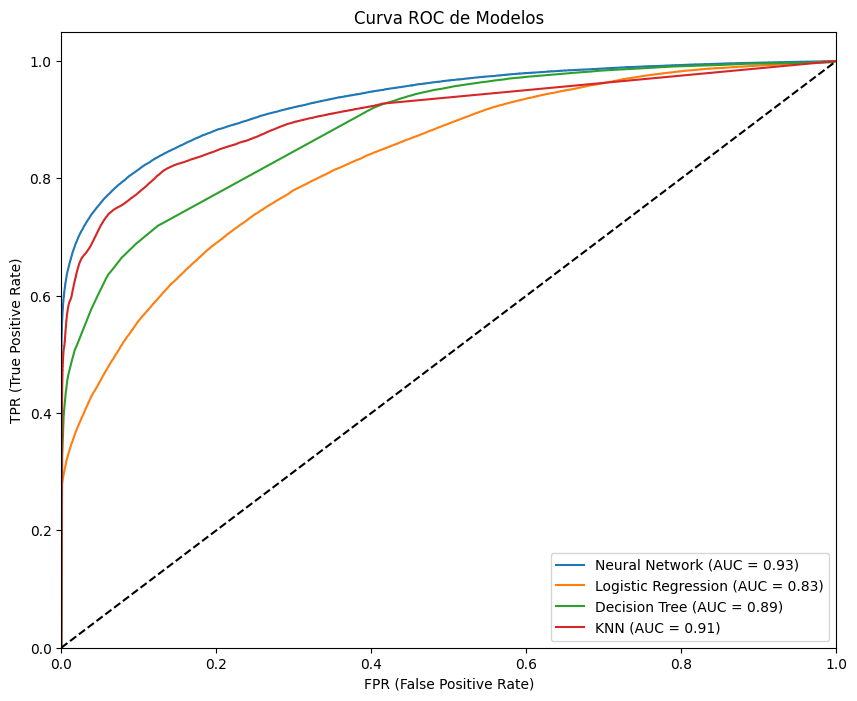

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

results_individual = []

# Inicializa una figura para las curvas ROC
plt.figure(figsize=(10, 8))

for model_name, model in individual_models.items():
    print(f'Training {model_name}...')
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f'{model_name} trained in {training_time:.2f} seconds.')

    # Predicciones
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Cálculos de métricas
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results_individual.append([model_name, acc, rec, f1, prec, auc_score, training_time])

    # Curva ROC
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Curva de entrenamiento (si el modelo tiene atributos de entrenamiento)
    if hasattr(model, 'score_samples'):
        train_scores = cross_val_score(model, X_train, y_train, cv=5)
        plt.plot(range(len(train_scores)), train_scores, label=f'{model_name} Training Score')

results_individual_df = pd.DataFrame(results_individual, columns=['Modelo', 'Accuracy', 'Recall', 'F1-Score', 'Precision', 'AUC-ROC', 'Tiempo'])
print("Resultados de modelos individuales:")
print(results_individual_df.sort_values(by='F1-Score', ascending=False))

# Configuración de la gráfica ROC
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia (aleatoria)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('Curva ROC de Modelos')
plt.legend(loc="lower right")
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Blending - Accuracy: 0.9042458149650698
Blending - AUC-ROC: 0.9404962513440387
Blending - Recall: 0.7801094744905287
Blending - F1-Score: 0.8329045339149103
Blending - Precision: 0.89336427931797


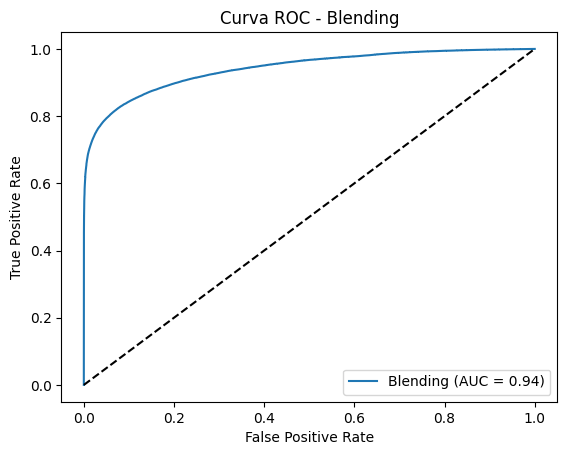

In [55]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, precision_score, roc_curve
import matplotlib.pyplot as plt

# Obtener predicciones de modelos individuales en el conjunto de entrenamiento (usando validación cruzada)
blend_train = np.column_stack([
    cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
    for model in individual_models.values()
])

# Obtener predicciones de modelos individuales en el conjunto de prueba
blend_test = np.column_stack([
    model.predict_proba(X_test)[:, 1]
    for model in individual_models.values()
])

# Entrenar el meta-modelo (Logistic Regression)
blending_model = LogisticRegression()
blending_model.fit(blend_train, y_train)

# Evaluar Blending
y_pred_blend = blending_model.predict(blend_test)
y_prob_blend = blending_model.predict_proba(blend_test)[:, 1]

# Calcular métricas
acc_blend = accuracy_score(y_test, y_pred_blend)
auc_blend = roc_auc_score(y_test, y_prob_blend)
rec_blend = recall_score(y_test, y_pred_blend)
f1_blend = f1_score(y_test, y_pred_blend)
prec_blend = precision_score(y_test, y_pred_blend)

# Imprimir resultados
print("\nBlending - Accuracy:", acc_blend)
print("Blending - AUC-ROC:", auc_blend)
print("Blending - Recall:", rec_blend)
print("Blending - F1-Score:", f1_blend)
print("Blending - Precision:", prec_blend)

# Graficar Curva ROC
fpr_blend, tpr_blend, _ = roc_curve(y_test, y_prob_blend)
plt.plot(fpr_blend, tpr_blend, label=f'Blending (AUC = {auc_blend:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Blending')
plt.legend(loc="lower right")
plt.show()


In [51]:
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, precision_score

# ===== STACKING =====
stacking_estimators = [(name, model) for name, model in individual_models.items()]
stacking_model = StackingClassifier(estimators=stacking_estimators, final_estimator=LogisticRegression(), cv=3, n_jobs=-1)

# Entrenamiento y evaluación de Stacking
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)
y_prob_stack = stacking_model.predict_proba(X_test)[:, 1]
acc_stack = accuracy_score(y_test, y_pred_stack)
auc_stack = roc_auc_score(y_test, y_prob_stack)
rec_stack = recall_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)
prec_stack = precision_score(y_test, y_pred_stack)

print("\nStacking - Accuracy:", acc_stack)
print("Stacking - AUC-ROC:", auc_stack)

# ===== BLENDING =====
# Usamos la predicción `predict_proba` de cada modelo sin hacer cross-validation
blend_train = np.column_stack([model.predict_proba(X_train)[:, 1] for model in individual_models.values()])
blend_test = np.column_stack([model.predict_proba(X_test)[:, 1] for model in individual_models.values()])

# Entrenar el modelo de Blending
blending_model = LogisticRegression(n_jobs=-1)
blending_model.fit(blend_train, y_train)

# Evaluar Blending
y_pred_blend = blending_model.predict(blend_test)
y_prob_blend = blending_model.predict_proba(blend_test)[:, 1]
acc_blend = accuracy_score(y_test, y_pred_blend)
auc_blend = roc_auc_score(y_test, y_prob_blend)
rec_blend = recall_score(y_test, y_pred_blend)
f1_blend = f1_score(y_test, y_pred_blend)
prec_blend = precision_score(y_test, y_pred_blend)

print("\nBlending - Accuracy:", acc_blend)
print("Blending - AUC-ROC:", auc_blend)



Stacking - Accuracy: 0.8942134477657845
Stacking - AUC-ROC: 0.931619980735718

Blending - Accuracy: 0.8826335085946386
Blending - AUC-ROC: 0.9224101487249117


# Modelos sin PCA

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE  # Importar SMOTE

# Separar características (X) y target (y)
X = df_transformed  # Características
y = datos_df['target']  # Target original

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Balanceo de clases con SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' ajusta automáticamente al 50% de las clases minoritarias
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Aplicar SMOTE para balancear las clases
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Ajustar la clase minoritaria al 50% de la mayoritaria
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Distribución después de SMOTE:")
print(y_train_res.value_counts())

In [ ]:


# balancing the dataset

models = [

    ('Original', clean_df),

    ('RandomUnderSampler', RandomUnderSampler(sampling_strategy='auto')),

    ('TomekLinks', TomekLinks(sampling_strategy='auto')),

    ('EditedNearestNeighbours', EditedNearestNeighbours(sampling_strategy='auto')),

    ('RandomOverSampler', RandomOverSampler(sampling_strategy='auto')),

    ('SMOTE', SMOTE(sampling_strategy='auto')),

    ('SMOTEENN', SMOTEENN(sampling_strategy='auto')),

    ('SMOTETomek', SMOTETomek(sampling_strategy='auto')),

]



fig, ax = plt.subplots(3, 3, figsize=(15, 10))

ax = ax.ravel()



for i, (name, model) in enumerate(models):

    if name == 'Original':

        data = clean_df

    else:

        data = clean_df.copy()



        # fit the model

        Xr, yr = model.fit_resample(data.drop(columns='churned'), data['churned'])

        data = pd.concat([Xr, yr], axis=1)



    sns.countplot(data=data, x='churned', ax=ax[i], hue='churned')

    # annotate percentage

    total = len(data)

    for p in ax[i].patches:

        percentage = '{:.1f}%'.format(100 * p.get_height() / total)

        x = p.get_x() + p.get_width() / 2

        y = p.get_height()

        ax[i].annotate(percentage, (x, y), ha='center', va='bottom')

    ax[i].set_title(name)



plt.tight_layout()

plt.show()



In [58]:
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE con menor generación de datos sintéticos
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Definir los modelos y sus hiperparámetros optimizados
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=500),
        'params': {'C': [0.1, 1, 10], 'solver': ['liblinear']}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [3, 5, None], 'min_samples_split': [2, 5]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [30, 50, 100], 'max_depth': [3, 5, 10]}
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='logloss'),
        'params': {'n_estimators': [30, 50, 100], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'NeuralNetwork': {
        'model': MLPClassifier(max_iter=500),
        'params': {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001]}
    }
}
best_models = {}



In [59]:

# Reducir el tamaño de X_train_res si es demasiado grande
sample_size = min(30000, len(X_train_res))
X_train_res_sample, y_train_res_sample = X_train_res.sample(sample_size, random_state=42), y_train_res.sample(sample_size, random_state=42)


In [ ]:

for name, mp in models.items():
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_res_sample, y_train_res_sample)
    best_models[name] = grid_search.best_estimator_
    print(f"Mejor modelo para {name}: {grid_search.best_params_}")

# Evaluación en conjunto de prueba
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=3)
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', label='Entrenamiento')
    plt.plot(train_sizes, test_mean, 'o-', label='Validación')
    plt.title(f'Curva de Aprendizaje - {title}')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\nEvaluación del modelo {name}:")
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))
    if y_prob is not None:
        print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

    # Graficar curva de aprendizaje solo si hay pocos datos
    if len(X_train_res_sample) <= 5000:
        plot_learning_curve(model, X_train_res_sample, y_train_res_sample, name)

Mejor modelo para LogisticRegression: {'C': 1, 'solver': 'liblinear'}
Mejor modelo para DecisionTree: {'max_depth': None, 'min_samples_split': 5}
Mejor modelo para RandomForest: {'max_depth': 10, 'n_estimators': 50}
Mejor modelo para XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}


## Con PCA

In [35]:
# Aplicar PCA
pca = PCA(n_components=0.95)  # Mantiene el 95% de la varianza explicada
pca_transformed = pca.fit_transform(df_transformed)

# Convertir resultado de PCA a DataFrame
df_pca = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])])

# Mostrar varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(explained_variance)

# Mostrar el DataFrame transformado con PCA
print("\nDataFrame final con PCA aplicado:")
print(df_pca.head())

Varianza explicada por cada componente principal:
[0.2011027  0.0767406  0.07002702 0.06248906 0.05703677 0.04697697
 0.04602498 0.03971706 0.03533357 0.02719103 0.0264861  0.02477869
 0.02353916 0.02205914 0.02087443 0.01879983 0.01761537 0.01591847
 0.01512558 0.01495451 0.01446402 0.01375887 0.01334865 0.0080088
 0.007514   0.0069948  0.00558775 0.00524551 0.00463339 0.00416809
 0.00328994 0.0031564 ]

DataFrame final con PCA aplicado:
    PC1   PC2   PC3    PC4   PC5   PC6   PC7   PC8   PC9  PC10  ...  PC23  \
0 -0.45  3.26  2.05  -3.80 -1.15  0.22  1.01 -0.35  0.39  0.35  ...  0.89   
1  6.17  6.96 23.93 -14.52  8.04 -6.10 43.55  1.14  0.52 -3.10  ... -1.15   
2 -2.83 -1.99  9.11  -8.54  0.69 -2.05 14.54 -1.41 -2.49 -0.56  ... -0.02   
3  5.03  2.03  4.85  -3.21 -0.34 -1.27  8.74  0.17  0.71 -1.88  ...  0.27   
4  6.48  8.44 27.65 -18.38  9.28 -7.75 58.11  2.11 -0.10 -4.59  ... -3.03   

   PC24  PC25  PC26  PC27  PC28  PC29  PC30  PC31  PC32  
0  0.51 -0.33 -0.17 -0.23 -0.82 -0.2

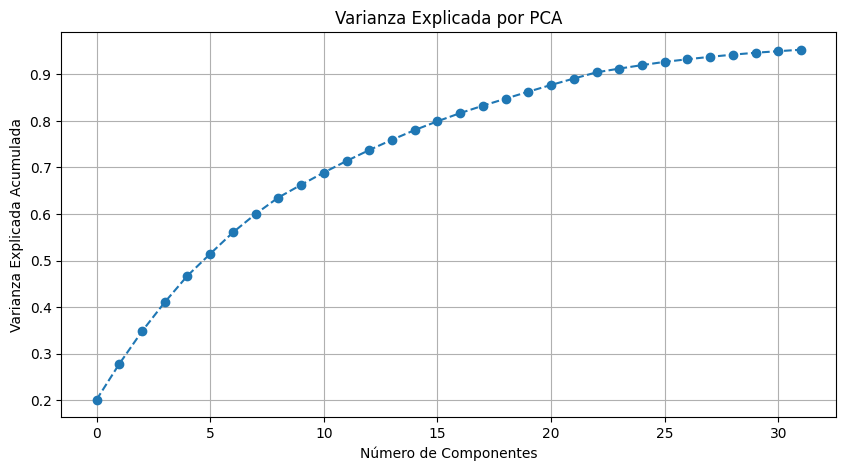

In [36]:

# Obtener la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(explained_variance)

# Graficar la varianza acumulada
plt.figure(figsize=(10,5))
plt.plot(varianza_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por PCA')
plt.grid()
plt.show()


In [37]:
# Ver las cargas de las componentes principales
loadings = pca.components_

# Obtener los nombres de las variables originales después de One-Hot Encoding
# Para las variables categóricas codificadas
variables_originales = num_cols + list(encoder.get_feature_names_out(cat_cols))

# Crear un DataFrame de las cargas de las componentes principales y las variables
loadings_df = pd.DataFrame(loadings, columns=variables_originales)

# Mostrar el DataFrame con las cargas
print("Cargas de las Componentes Principales:")
print(loadings_df)

# Si deseas ver la contribución de cada variable a cada componente de forma ordenada
for i in range(loadings_df.shape[0]):  # Para cada componente
    print(f"\nComponent {i+1}:")
    print(loadings_df.iloc[i].sort_values(ascending=False))  # Ordena las cargas por importancia

Cargas de las Componentes Principales:
    tasa_creds_3m  tasa_em_creds_3m  em_porc_pen  em_empl_saldcredt_prom_3m  \
0            0.00              0.01         0.02                       0.02   
1            0.05              0.05         0.06                       0.07   
2            0.19              0.29         0.28                       0.26   
3           -0.07             -0.07        -0.10                      -0.11   
4            0.12              0.19         0.18                       0.16   
5           -0.04             -0.03        -0.04                      -0.04   
6           -0.06             -0.19        -0.10                      -0.08   
7           -0.05             -0.02        -0.03                      -0.03   
8           -0.03             -0.00        -0.03                      -0.03   
9            0.04              0.10         0.05                       0.04   
10          -0.03              0.01        -0.03                      -0.04   
11           

In [38]:
# Agregar comentarios

In [39]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



In [40]:
# Obtener la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(explained_variance)
varianza_acumulada

array([0.2011027 , 0.2778433 , 0.34787032, 0.41035938, 0.46739615,
       0.51437311, 0.5603981 , 0.60011516, 0.63544873, 0.66263977,
       0.68912587, 0.71390456, 0.73744371, 0.75950285, 0.78037729,
       0.79917711, 0.81679249, 0.83271096, 0.84783654, 0.86279105,
       0.87725507, 0.89101394, 0.9043626 , 0.9123714 , 0.91988539,
       0.92688019, 0.93246794, 0.93771345, 0.94234685, 0.94651494,
       0.94980488, 0.95296128])

In [41]:

# Número mínimo de componentes que explican el 95% de la varianza
num_componentes_optimos = np.argmax(varianza_acumulada >= 0.95) + 1
print(f"Número óptimo de componentes: {num_componentes_optimos}")


Número óptimo de componentes: 32


In [42]:

# Reducir el DataFrame a las componentes óptimas
df_pca_opt = df_pca.iloc[:, :num_componentes_optimos]
df_pca_opt.head()

PC1   PC2   PC3    PC4   PC5   PC6   PC7   PC8   PC9  PC10  ...  PC23  \
0 -0.45  3.26  2.05  -3.80 -1.15  0.22  1.01 -0.35  0.39  0.35  ...  0.89   
1  6.17  6.96 23.93 -14.52  8.04 -6.10 43.55  1.14  0.52 -3.10  ... -1.15   
2 -2.83 -1.99  9.11  -8.54  0.69 -2.05 14.54 -1.41 -2.49 -0.56  ... -0.02   
3  5.03  2.03  4.85  -3.21 -0.34 -1.27  8.74  0.17  0.71 -1.88  ...  0.27   
4  6.48  8.44 27.65 -18.38  9.28 -7.75 58.11  2.11 -0.10 -4.59  ... -3.03   

   PC24  PC25  PC26  PC27  PC28  PC29  PC30  PC31  PC32  
0  0.51 -0.33 -0.17 -0.23 -0.82 -0.20  0.45 -0.66  0.26  
1  0.48 -0.97  4.14 -1.59  0.29 -0.23  0.55  0.35  0.32  
2 -0.18 -0.36  0.56 -1.03 -0.09  0.08 -0.08 -0.65 -0.11  
3 -0.14 -0.81  0.87 -0.47  0.32 -0.13  0.38 -0.51  1.06  
4  0.42 -0.85  2.97 -0.72  0.23 -0.24  0.47  0.29 -0.09  

[5 rows x 32 columns]

In [43]:

# Definir la variable objetivo y las características
X = df_pca_opt  # Variables después de reducción con PCA
y = datos_df['target']  # Target original



In [44]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [45]:
# Manejar el desbalanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)



Entrenando LogisticRegression...
Accuracy del modelo LogisticRegression: 0.9574061107379879

Entrenando RandomForest...


KeyboardInterrupt: 

In [46]:
# Entrenar modelo de Regresión Logística
model = LogisticRegression(random_state=42)
model.fit(X_train_res, y_train_res)


LogisticRegression(random_state=42)

In [47]:

# Predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [48]:
# Evaluación del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Matriz de confusión:
[[861016 545898]
 [ 16321  46342]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.61      0.75   1406914
           1       0.08      0.74      0.14     62663

    accuracy                           0.62   1469577
   macro avg       0.53      0.68      0.45   1469577
weighted avg       0.94      0.62      0.73   1469577

ROC AUC Score: 0.738907554367416


In [49]:
from sklearn.metrics import accuracy_score
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')


Accuracy del modelo: 0.6174280081955555


In [ ]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier


#from sklearn.svm import SVC
#import xgboost as xgb
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import accuracy_score

# Crear un diccionario de modelos
#modelos = {
#    'LogisticRegression': LogisticRegression(random_state=42),
#    'RandomForest': RandomForestClassifier(random_state=42),
#    'SVM': SVC(random_state=42),
#    'XGBoost': xgb.XGBClassifier(random_state=42),
#    'KNN': KNeighborsClassifier(),
#    'DecisionTree': DecisionTreeClassifier(random_state=42),
#    'NaiveBayes': GaussianNB()
#}

# Ciclo para entrenar y evaluar todos los modelos
#for nombre_modelo, modelo in modelos.items():
#    print(f"Entrenando {nombre_modelo}...")

    # Entrenar el modelo
#    modelo.fit(X_train, y_train)

    # Hacer predicciones
#    y_pred = modelo.predict(X_test)

    # Evaluar el modelo
#    accuracy = accuracy_score(y_test, y_pred)

    # Imprimir los resultados
#    print(f'Accuracy del modelo {nombre_modelo}: {accuracy}\n')

**Sin PCA**

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE  # Importar SMOTE

# Separar características (X) y target (y)
X = df_transformed  # Características
y = datos_df['target']  # Target original

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:

# Balanceo de clases con SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' ajusta automáticamente al 50% de las clases minoritarias
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)



In [21]:
# Crear y entrenar el modelo
model = LogisticRegression()
model.fit(X_train_res, y_train_res)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')


Accuracy del modelo: 0.7583726473672356



Importancia de las características (Regresión Logística):
                 Feature  Coefficient  Abs_Coefficient
8       edad_perdida_emp   -39.926414        39.926414
7           edad_ingreso    37.475530        37.475530
10    meses_antig_en_emp     6.742751         6.742751
69   disper_edad_ingreso    -3.634528         3.634528
27      em_num_creds_emp    -2.817693         2.817693
..                   ...          ...              ...
22   em_porc_pen_prom_3m    -0.015042         0.015042
40          tasa_disp_3m     0.013528         0.013528
60           tasa_rot_6m    -0.006830         0.006830
48  tasa_em_sdo_creds_3m    -0.006608         0.006608
54           catp_disper    -0.002701         0.002701

[87 rows x 3 columns]


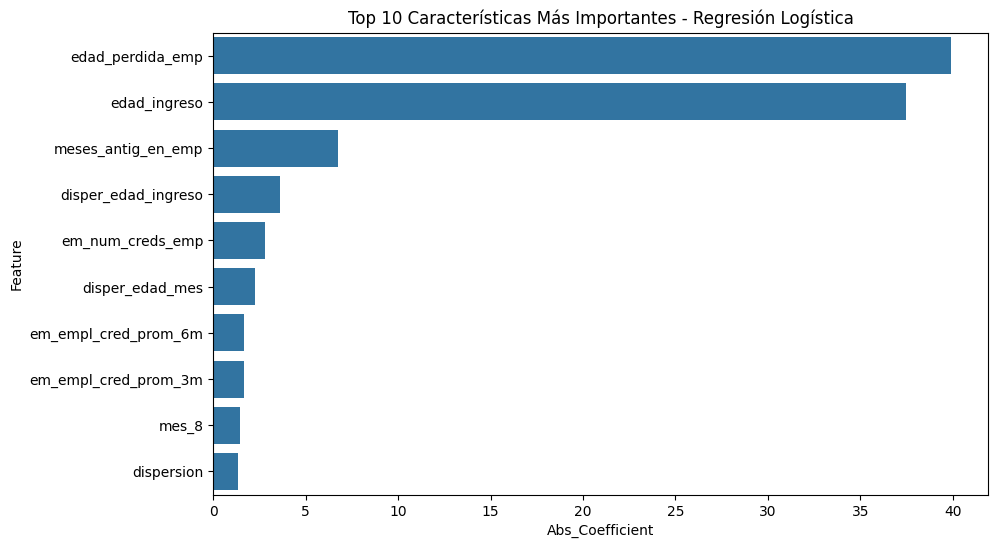

In [23]:

# Obtener los coeficientes del modelo
coeficientes = model.coef_[0]

# Crear un DataFrame con las características y sus coeficientes
feature_importance_df = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Coefficient': coeficientes
})

# Ordenar las características por la magnitud del coeficiente (valor absoluto)
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Mostrar las características más importantes
print("\nImportancia de las características (Regresión Logística):")
print(feature_importance_df)

# Graficar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance_df.head(10))  # Mostrar top 10
plt.title("Top 10 Características Más Importantes - Regresión Logística")
plt.show()

In [24]:
# Predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [25]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_ajustado = (y_pred_proba > 0.3).astype(int)  # Umbral de 0.3 en lugar de 0.5

In [29]:
# Evaluación del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score



print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Matriz de confusión:
[[1062634  344570]
 [  10520   51853]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86   1407204
           1       0.13      0.83      0.23     62373

    accuracy                           0.76   1469577
   macro avg       0.56      0.79      0.54   1469577
weighted avg       0.95      0.76      0.83   1469577

ROC AUC Score: 0.865907399606678


In [30]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f'Recall del modelo: {recall:.4f}')

Recall del modelo: 0.8313


Deben hacer un análisis de la métrica relevante. ¿Qué es más costoso para el negocio? Los falsos positivos o los negativos? Si son los primeros, hay que considerar la precisión, si son los negativos, la métrica más importante sería el recall.

1️⃣ Recall para la clase 1 (pérdida de empleo)
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
=
51
,
853
51
,
853
+
10
,
520
=
0.83
Recall=
TP+FN
TP
​
 =
51,853+10,520
51,853
​
 =0.83
🔹 ✅ Excelente Recall (83%) → El modelo está capturando el 83% de los casos reales de pérdida de empleo, lo cual es bueno para tu objetivo.

2️⃣ Precisión para la clase 1
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
=
51
,
853
51
,
853
+
344
,
570
=
0.13
Precision=
TP+FP
TP
​
 =
51,853+344,570
51,853
​
 =0.13
🔸 ❌ Baja Precisión (13%) → Muchos falsos positivos, lo que significa que hay muchas falsas alertas.

3️⃣ F1-score
𝐹
1
=
2
×
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
×
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
+
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
=
2
×
0.13
×
0.83
0.13
+
0.83
=
0.23
F1=2×
Precision+Recall
Precision×Recall
​
 =2×
0.13+0.83
0.13×0.83
​
 =0.23
🔹 Bajo F1-score (23%), pero como el recall es alto, el modelo cumple con la prioridad de minimizar falsos negativos.

4️⃣ ROC AUC Score
Un AUC de ROC alto sugiere que el modelo es bueno separando ambas clases. No lo has mencionado, pero si está por encima de 0.75 o 0.80, es aceptable.

🔹 Conclusión
✅ El modelo es bueno para el objetivo de minimizar falsos negativos porque:

Captura el 83% de los casos reales de pérdida de empleo (recall = 0.83).
Aunque tiene una precisión baja (13%), eso es aceptable en este caso, ya que es mejor tener falsos positivos que falsos negativos.
La matriz de confusión indica que el modelo identifica correctamente la mayoría de los empleados en riesgo.
🔸 ¿Cómo mejorarlo?
Si quieres reducir los falsos positivos sin sacrificar mucho recall, podrías:

Ajustar el umbral de decisión (por ejemplo, probar con 0.4 en lugar de 0.5).
Probar técnicas de balanceo de clases (como SMOTE o ajuste de class_weight en modelos como Random Forest o XGBoost).
Utilizar modelos más sofisticados como XGBoost o LightGBM para mejorar la separación entre clases.
📌 ¿Quieres que ajustemos el umbral para encontrar el punto óptimo entre precisión y recall? 🚀

Recomiendo utilizar la curva de aprendizaje que les proporciona una visualización clara del comportamiento del modelo en función del tamaño del conjunto de entrenamiento. Si la diferencia entre las puntuaciones de entrenamiento y validación es pequeña (menos del 5), indica que el modelo generaliza bien. Una diferencia del 20% o más entre el conjunto de entrenamiento y el conjunto de validación puede considerarse significativa y generalmente indica sobreajuste.

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mejor modelo para LogisticRegression: {'C': 1, 'solver': 'liblinear'}
Mejor modelo para DecisionTree: {'max_depth': None, 'min_samples_split': 5}
Mejor modelo para RandomForest: {'max_depth': None, 'n_estimators': 100}

Evaluación del modelo LogisticRegression:
Matriz de confusión:
[[1045506  361698]
 [  10288   52085]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85   1407204
           1       0.13      0.84      0.22     62373

    accuracy                           0.75   1469577
   macro avg       0.56      0.79      0.53   1469577
weighted avg       0.95      0.75      0.82   1469577

ROC AUC Score: 0.8620949652377307


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

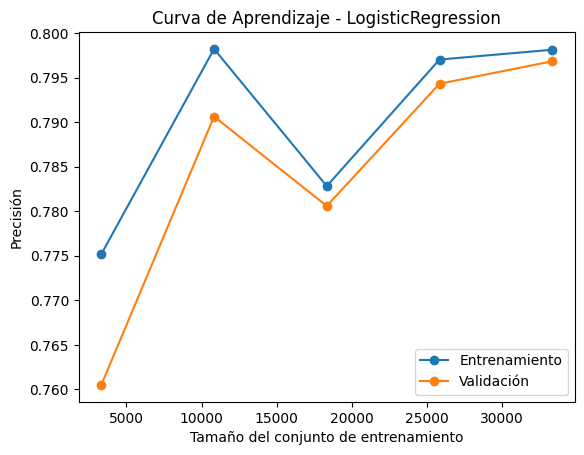


Evaluación del modelo DecisionTree:
Matriz de confusión:
[[1135876  271328]
 [  37425   24948]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88   1407204
           1       0.08      0.40      0.14     62373

    accuracy                           0.79   1469577
   macro avg       0.53      0.60      0.51   1469577
weighted avg       0.93      0.79      0.85   1469577

ROC AUC Score: 0.6100901659561008


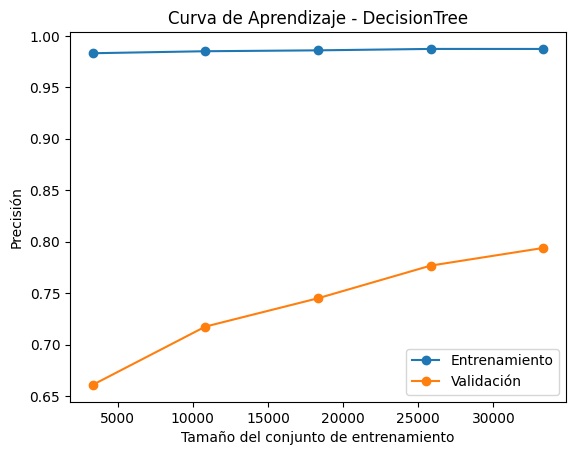


Evaluación del modelo RandomForest:
Matriz de confusión:
[[1118962  288242]
 [  23351   39022]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88   1407204
           1       0.12      0.63      0.20     62373

    accuracy                           0.79   1469577
   macro avg       0.55      0.71      0.54   1469577
weighted avg       0.94      0.79      0.85   1469577

ROC AUC Score: 0.7961881847144485


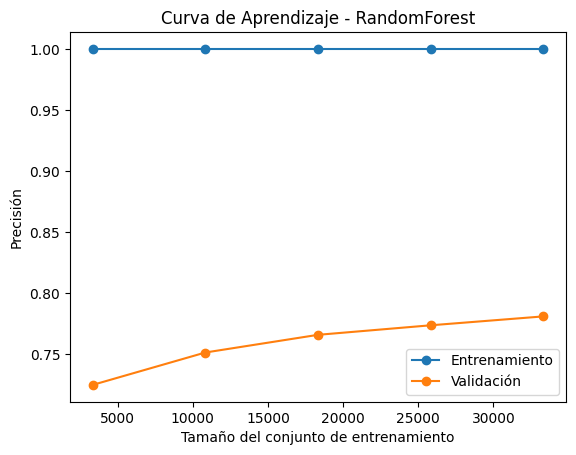

In [31]:
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Definir los modelos y sus hiperparámetros optimizados
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {'C': [0.1, 1, 10], 'solver': ['liblinear']}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [3, 5, None], 'min_samples_split': [2, 5]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [50, 100], 'max_depth': [5, None]}
    }
}

best_models = {}

# Reducir el tamaño de X_train_res si es demasiado grande
if len(X_train_res) > 50000:
    X_train_res_sample, y_train_res_sample = X_train_res.sample(50000, random_state=42), y_train_res.sample(50000, random_state=42)
else:
    X_train_res_sample, y_train_res_sample = X_train_res, y_train_res

for name, mp in models.items():
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_res_sample, y_train_res_sample)
    best_models[name] = grid_search.best_estimator_
    print(f"Mejor modelo para {name}: {grid_search.best_params_}")

# Evaluación en conjunto de prueba
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\nEvaluación del modelo {name}:")
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

    # Curva de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_res_sample, y_train_res_sample, cv=3)
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', label='Entrenamiento')
    plt.plot(train_sizes, test_mean, 'o-', label='Validación')
    plt.title(f'Curva de Aprendizaje - {name}')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()


